# TFG in python

## Packages

In [1]:
#PAQUETES------------------------------------------------------------------------------------------------------------------
from astropy.io import fits #para importar fits files
from matplotlib.pyplot import *
from math import * 
from pandas import * #para dataframes
from numpy import *
from uncertainties import * #para propagate error
import uncertainties.unumpy as unumpy #para propagate error
from extinction import *  #para calculo extinciones
from scipy.stats import * #para los density scatter plots
from scipy.optimize import curve_fit #para ajuste polinomial
from seaborn import * #para el marginal histogram
from mpl_toolkits.axes_grid1 import make_axes_locatable #para el marginal histogram
from sklearn.metrics import * #calculo de R^2
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset #zoom en plots

# %matplotlib tk (MOSTRAR PLOT EMERGENTE)
# %matplotlib inline (MOSTAR PLOT EN JUPYTER)

## Data

In [2]:
#DATOS---------------------------------------------------------------------------------------------------------------------

#Adjuntamos Datos
FITS=fits.open(".\\Catálogos\\GANDALF_MASAS_COORDENADAS.fits") #lee .fits
datos=FITS[1].data #datos 
#Buscamos filas haciendo FITS[1].data[1] o columnas FITS[1].data["FLUX_OBS_1"] (e.g)

#Datos del Diagrama BPT
Ha=datos["FLUX_OBS_Ha"] #flujo 24
Hb=datos["FLUX_OBS_Hb"] #flujo 15
NII6583=datos["FLUX_OBS_NII6583"] #flujo 25
OIII5007=datos["FLUX_OBS_OIII5007"] #flujo 17

Ha_Error=datos["FLUX_ERROR_24"]
Hb_Error=datos["FLUX_ERROR_15"]
NII6583_Error=datos["FLUX_ERROR_25"]
OIII5007_Error=datos["FLUX_ERROR_17"]

AoN_Ha=datos["AON_24"]
AoN_Hb=datos["AON_15"]
AoN_NII6583=datos["AON_25"]
AoN_OIII5007=datos["AON_17"]

logmstar=datos["logmstar"]
dellogmstar=datos["dellogmstar"]

redshift=datos["Z"]

EW_Ha=datos["EW_24"] #medido en Amstongs
EW_Ha_Error=datos["EW_ERROR_24"]


## BPT diagram

C:\Users\juana\AppData\Local\Temp\ipykernel_14204\3513055911.py:23: RuntimeWarning: invalid value encountered in greater
  if Ha[i]>0 and Ha[i]!=inf and Hb[i]>0 and Hb[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and OIII5007[i]>0 and OIII5007[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_Hb[i]>2 and AoN_OIII5007[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and Hb_Error[i]>=0 and Hb_Error[i]!=inf and OIII5007_Error[i]>=0 and OIII5007_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf:


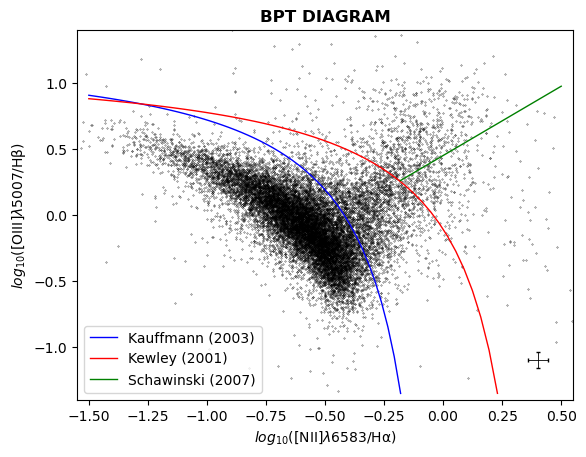

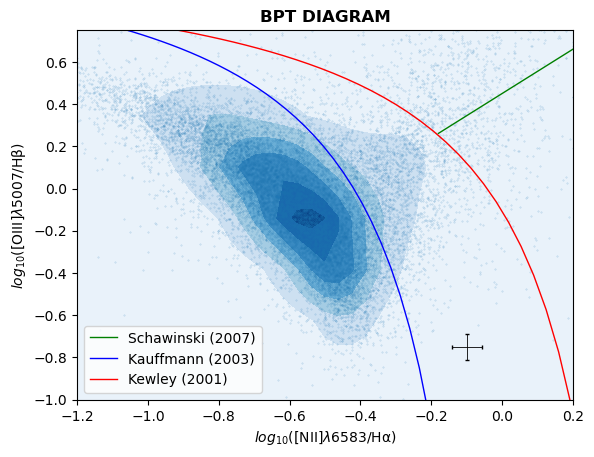

In [3]:
#DIAGRAMA BPT -------------------------------------------------------------------------------------------------------------

#Condicionales
Ha_ok=[] #introducimos flujos que cumplan las condiciones
Hb_ok=[]
NII6583_ok=[]
OIII5007_ok=[]

Ha_ok_Error=[] #introducimos errores de los flujos que cumplan las condiciones
Hb_ok_Error=[]
NII6583_ok_Error=[]
OIII5007_ok_Error=[]

logmstar_ok=[] #introducimos los logmstar que cumplan las condiciones
dellogmstar_ok=[] #error logmstar

AoN_Ha_ok=[] #introducimos AoN 
AoN_Hb_ok=[]
AoN_NII6583_ok=[]
AoN_OIII5007_ok=[]

for i in range(len(Ha)): #condiciones
    if Ha[i]>0 and Ha[i]!=inf and Hb[i]>0 and Hb[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and OIII5007[i]>0 and OIII5007[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_Hb[i]>2 and AoN_OIII5007[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and Hb_Error[i]>=0 and Hb_Error[i]!=inf and OIII5007_Error[i]>=0 and OIII5007_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf: 
        Ha_ok.append(Ha[i])
        Hb_ok.append(Hb[i])
        NII6583_ok.append(NII6583[i])
        OIII5007_ok.append(OIII5007[i])

        Ha_ok_Error.append(Ha_Error[i])
        Hb_ok_Error.append(Hb_Error[i])
        NII6583_ok_Error.append(NII6583_Error[i])
        OIII5007_ok_Error.append(OIII5007_Error[i])

        logmstar_ok.append(logmstar[i])
        dellogmstar_ok.append(dellogmstar[i])
        
        AoN_Ha_ok.append(AoN_Ha[i])
        AoN_Hb_ok.append(AoN_Hb[i])
        AoN_NII6583_ok.append(AoN_NII6583[i])
        AoN_OIII5007_ok.append(AoN_OIII5007[i])
        
#Ejes del Diagrama BPT
x_BPT=log10(array(NII6583_ok)/array(Ha_ok))
y_BPT=log10(array(OIII5007_ok)/array(Hb_ok))

#Errores
Ha_and_Error=unumpy.uarray(Ha_ok,Ha_ok_Error) #definimos la variable con su error
Hb_and_Error=unumpy.uarray(Hb_ok,Hb_ok_Error)
NII6583_and_Error=unumpy.uarray(NII6583_ok,NII6583_ok_Error)
OIII5007_and_Error=unumpy.uarray(OIII5007_ok,OIII5007_ok_Error)

x_BPT_and_Error=unumpy.log10(array(NII6583_and_Error)/array(Ha_and_Error)) #ejes diagrama BPT en funcion de las variables con su error
y_BPT_and_Error=unumpy.log10(array(OIII5007_and_Error)/array(Hb_and_Error)) 

errx_BPT=unumpy.std_devs(x_BPT_and_Error) #propagate error de x
erry_BPT=unumpy.std_devs(y_BPT_and_Error) #propagate error de y

#Ploteamos BPT y funciones
plot(x_BPT,y_BPT,".",markersize=0.5,color="black")
xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT DIAGRAM",weight="bold")

x_Kauffman=linspace(-1.5,-0.18) #Kauffman
y_Kauffman=(0.61/(x_Kauffman-0.05))+1.3 
plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1)

x_kewley=linspace(-1.5,0.23) #Kewley
y_Kewley=(0.61/(x_kewley-0.47))+1.19 
plot(x_kewley,y_Kewley,color="red",label="Kewley (2001)",linewidth=1)

x_Schawinski=linspace(-0.180,0.5) #Schawinski
y_Schawinski=1.05*x_Schawinski+0.45
plot(x_Schawinski,y_Schawinski,color="green",label="Schawinski (2007)",linewidth=1)

xlim(-1.55,0.55)
ylim(-1.4,1.4)
errorbar(0.4,-1.1,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

legend()

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

#DENSITY SCATTER PLOT
#Crea un objeto de densidad de kernel
kde=gaussian_kde([ravel(x_BPT),ravel(y_BPT)])

#Crea una cuadrícula de valores para el gráfico de contorno
xmin,ymin=min(x_BPT),min(y_BPT)
xmax,ymax=max(x_BPT),max(y_BPT)
xii,yii=mgrid[xmin:xmax:100j,ymin:ymax:100j]
zii=kde(vstack([xii.flatten(),yii.flatten()]))

#Crea el gráfico de densidad de puntos difuminados
contourf(xii,yii,zii.reshape(xii.shape),cmap="Blues")
scatter(x_BPT,y_BPT,s=0.1,alpha=0.3)

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT DIAGRAM",weight="bold")

xlim(-1.2,0.2)
ylim(-1,0.75)
errorbar(-0.1,-0.75,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

plot(x_Schawinski,y_Schawinski,color="green",label="Schawinski (2007)",linewidth=1)
plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1)
plot(x_kewley,y_Kewley,color="red",label="Kewley (2001)",linewidth=1)

legend()

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()


## Sky regions

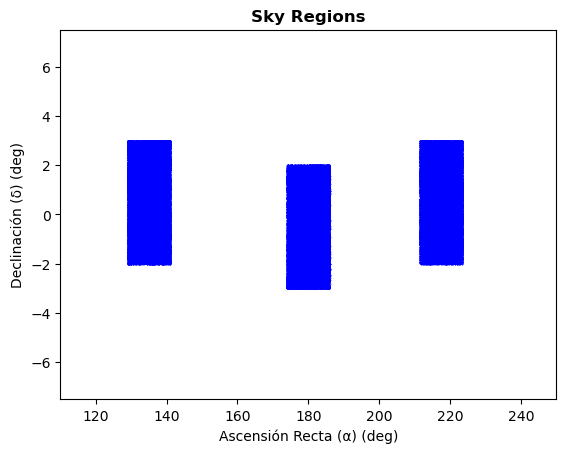

In [4]:
#SKY REGIONS---------------------------------------------------------------------------------------------------------------

#Coordenadas
DEC=datos["DEC_1"]
RA=datos["RA_1"]

plot(RA,DEC,".",markersize=0.5,color="blue")
ylabel("Declinación (\u03B4) (deg)") 
xlabel("Ascensión Recta (\u03B1) (deg)")
title("Sky Regions",weight="bold")
ylim(-7.5,7.5)
xlim(110,250)
show()

## WHAN diagram

C:\Users\juana\AppData\Local\Temp\ipykernel_14204\2232404417.py:13: RuntimeWarning: invalid value encountered in greater_equal
  if Ha[i]>0 and Ha[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf and EW_Ha[i]>0 and EW_Ha[i]!=inf and EW_Ha_Error[i]>=0 and EW_Ha_Error[i]!=inf:
C:\Users\juana\AppData\Local\Temp\ipykernel_14204\2232404417.py:13: RuntimeWarning: invalid value encountered in greater
  if Ha[i]>0 and Ha[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf and EW_Ha[i]>0 and EW_Ha[i]!=inf and EW_Ha_Error[i]>=0 and EW_Ha_Error[i]!=inf:


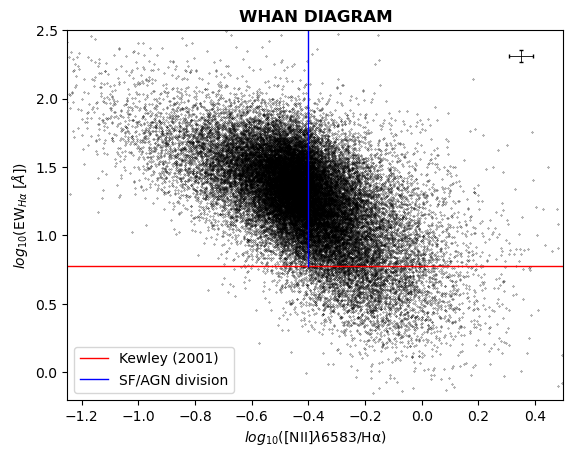

In [5]:
#DIAGRAMA WHAN---------------------------------------------------------------------------------------------------------------

#Condicionales
Ha_ok_WHAN=[] #introducimos los flujos y EW que cumplan las condiciones
NII6583_ok_WHAN=[]
EW_Ha_ok_WHAN=[]

Ha_ok_Error_WHAN=[] #introducimos los errores de flujos y EW que cumplan las condiciones
NII6583_ok_Error_WHAN=[]
EW_Ha_ok_Error_WHAN=[]

for i in range(len(Ha)): #condiciones
    if Ha[i]>0 and Ha[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf and EW_Ha[i]>0 and EW_Ha[i]!=inf and EW_Ha_Error[i]>=0 and EW_Ha_Error[i]!=inf: 
        Ha_ok_WHAN.append(Ha[i])
        NII6583_ok_WHAN.append(NII6583[i])
        EW_Ha_ok_WHAN.append(EW_Ha[i])

        Ha_ok_Error_WHAN.append(Ha_Error[i])
        NII6583_ok_Error_WHAN.append(NII6583_Error[i])
        EW_Ha_ok_Error_WHAN.append(EW_Ha_Error[i])

#Ejes del Diagrama WHAN
x_WHAN=log10(array(NII6583_ok_WHAN)/array(Ha_ok_WHAN))
y_WHAN=log10(array(EW_Ha_ok_WHAN))

#Errores

Ha_and_Error_WHAN=unumpy.uarray(Ha_ok_WHAN,Ha_ok_Error_WHAN) #definimos la variable con su error
NII6583_and_Error_WHAN=unumpy.uarray(NII6583_ok_WHAN,NII6583_ok_Error_WHAN)
EW_Ha_and_Error_WHAN=unumpy.uarray(EW_Ha_ok_WHAN,EW_Ha_ok_Error_WHAN)

x_WHAN_and_Error=unumpy.log10(array(NII6583_and_Error_WHAN)/array(Ha_and_Error_WHAN)) #ejes del diagrama WHAN en función de su variable con su error
y_WHAN_and_Error=unumpy.log10(array(EW_Ha_and_Error_WHAN))

errx_WHAN=unumpy.std_devs(x_WHAN_and_Error) #propagate error de x
erry_WHAN=unumpy.std_devs(y_WHAN_and_Error) #propagate error de y

#Ploteamos
plot(x_WHAN,y_WHAN,".",markersize=0.5,color="black")

xlim(-1.25,0.5)
ylim(-0.2,2.5)

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$(EW$_{H\u03B1}$ [$\AA$])")
title("WHAN DIAGRAM",weight="bold")

errorbar(0.35,2.31,xerr=0.041994829846394,yerr=median(erry_WHAN),color="black",elinewidth=0.6,capsize=1.2) #barras de error

x_kewley=linspace(-1.3,0.5) #Kewley
y_Kewley=log10(6)*x_kewley/x_kewley
plot(x_kewley,y_Kewley,color="red",label="Kewley (2001)",linewidth=1)

y_SFAGN=linspace(log10(6),2.5) #SF/AGN
x_SFAGN=-0.4*y_SFAGN/y_SFAGN
plot(x_SFAGN,y_SFAGN,color="blue",label="SF/AGN division",linewidth=1)

legend()
show()


## BPT diagram of SF galaxies

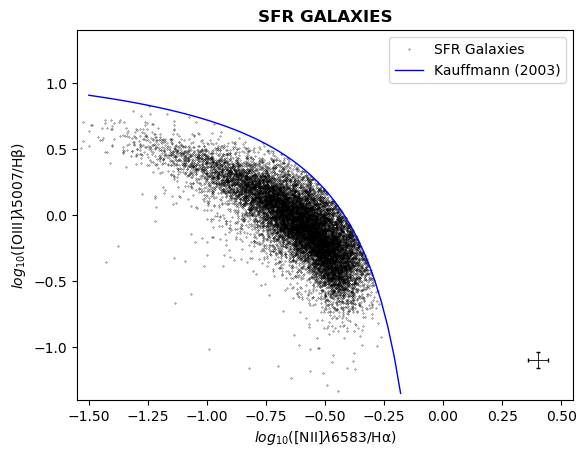

In [6]:
#STAR FORMING (SFR) ---------------------------------------------------------------------------------------------------

#Seleccionamos galaxias con SFR
y_Kauffman_condition=[] #Kauffman condition
for i in range(len(x_BPT)):
    y_Kauffman_condition.append((0.61/(x_BPT[i]-0.05))+1.3)
    
y_Kewley_condition=[] #Kewley condition
for i in range(len(x_BPT)):
    y_Kewley_condition.append((0.61/(x_BPT[i]-0.47))+1.19)
    
y_Schawinski_condition=[] #Schawinski  condition
for i in range(len(x_BPT)):
    y_Schawinski_condition.append(1.05*x_BPT[i]+0.45)

x_SFR=[] #introducimos aquellas galaxias por debajo de Kauffman (SFR)
y_SFR=[]

for i in range(len(x_BPT)):
    if y_BPT[i]<=y_Kauffman_condition[i] and x_BPT[i]<=0:
        x_SFR.append(x_BPT[i])
        y_SFR.append(y_BPT[i])

#Ploteamos SFR Galaxies
plot(x_SFR,y_SFR,".",markersize=0.5,color="black",label="SFR Galaxies") #SFR Galaxies
plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1) #Kauffman
xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("SFR GALAXIES",weight="bold")

xlim(-1.55,0.55)
ylim(-1.4,1.4)
errorbar(0.4,-1.1,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

legend()
show()

## Extinction correction

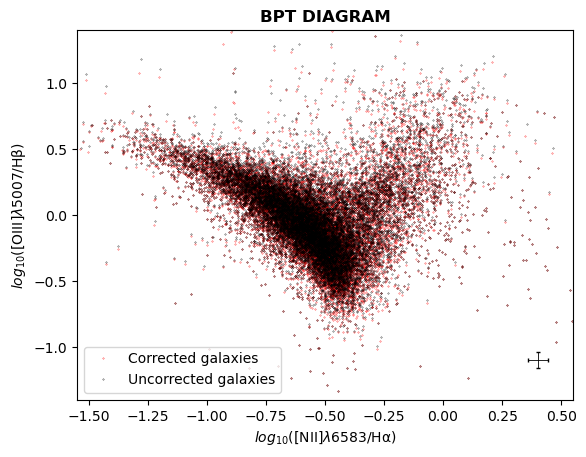

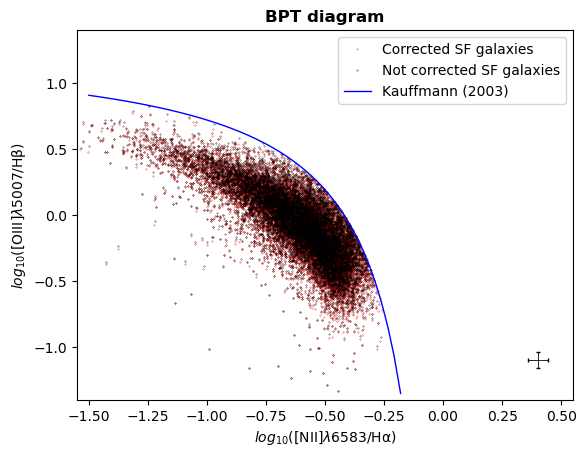

In [112]:
#CORRECCIÓN EXTINCIÓN ---------------------------------------------------------------------------------------------------

Ha_corrected=[]
Hb_corrected=[]
NII6583_corrected=[]
OIII5007_corrected=[]

#Flujos Corregidos por Cardelli et al. (1989)
for i in range(len(Ha_ok)):

    A_v=2.145*(1/-0.29834690766518845)*log10(2.86/(Ha_ok[i]/Hb_ok[i])) #A_v 

    #remove(A_lambda,flux)=F_corr=F_obs*10^(0,4*A_lambda) donde flux=F_obs y A_lambda=ccm89(wave,A_v,3.1)
 
    Ha_corrected.append(remove(ccm89(array([6562.80]),A_v,3.1),array(Ha_ok[i]))) #Correción flujos
    Hb_corrected.append(remove(ccm89(array([4861.32]),A_v,3.1),array(Hb_ok[i]))) 
    NII6583_corrected.append(remove(ccm89(array([6583.34]),A_v,3.1),array(NII6583_ok[i])))
    OIII5007_corrected.append(remove(ccm89(array([5006.7]),A_v,3.1),array(OIII5007_ok[i])))

#Contamos galaxias SF con flujos observados mayores que los corregidos (strange galaxies SF)
strange_galaxies=0

for i in range(len(Ha_corrected)):
    if y_BPT[i]<=y_Kauffman_condition[i] and x_BPT[i]<=0: 
        if Ha_ok[i]>Ha_corrected[i] or Hb_ok[i]>Hb_corrected[i] or OIII5007_ok[i]>OIII5007_corrected[i] or NII6583_ok[i]>NII6583_corrected[i]:
            strange_galaxies=strange_galaxies+1

#Seleccion de galaxias raras (con flujos observados>flujos corregidos)
for i in range(len(Ha_ok)):
    if Ha_ok[i]>Ha_corrected[i]: 
        Ha_corrected[i]=array([Ha_ok[i]])
    if Hb_ok[i]>Hb_corrected[i]: 
        Hb_corrected[i]=array([Hb_ok[i]])    
    if NII6583_ok[i]>NII6583_corrected[i]:
        NII6583_corrected[i]=array([NII6583_ok[i]])
    if OIII5007_ok[i]>OIII5007_corrected[i]:
        OIII5007_corrected[i]=array([OIII5007_ok[i]])

#Ejes del Diagrama BPT Corregidos por extinción
x_BPT_corrected=log10(array(NII6583_corrected)/array(Ha_corrected))
y_BPT_corrected=log10(array(OIII5007_corrected)/array(Hb_corrected))

#Ploteamos BPT Corregido y No Corregido
plot(x_BPT_corrected,y_BPT_corrected,".",markersize=0.5,color="red",label="Corrected galaxies")
plot(x_BPT,y_BPT,".",markersize=0.5,color="black",label="Uncorrected galaxies")

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT DIAGRAM",weight="bold")

xlim(-1.55,0.55)
ylim(-1.4,1.4)
errorbar(0.4,-1.1,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

legend()
show()

#Ploteamos la correción por extinción sólo para las SF
x_SFR_corrected=[] #introducimos aquellas galaxias por debajo de Kauffman (SFR) coon flujos corregidos
y_SFR_corrected=[]
for i in range(len(x_BPT_corrected)):
    if y_BPT_corrected[i]<=y_Kauffman_condition[i] and x_BPT_corrected[i]<=0:
        x_SFR_corrected.append(x_BPT_corrected[i])
        y_SFR_corrected.append(y_BPT_corrected[i])

plot(x_SFR_corrected,y_SFR_corrected,".",markersize=0.5,color="red",label="Corrected SF galaxies") #SFR Galaxies Corrected
plot(x_SFR,y_SFR,".",markersize=0.5,color="black",label="Not corrected SF galaxies") #SFR Galaxies

x_Kauffman=linspace(-1.5,-0.18) #Kauffman
y_Kauffman=(0.61/(x_Kauffman-0.05))+1.3 
plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1)

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT diagram",weight="bold")

xlim(-1.55,0.55)
ylim(-1.4,1.4)
errorbar(0.4,-1.1,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

legend()
#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

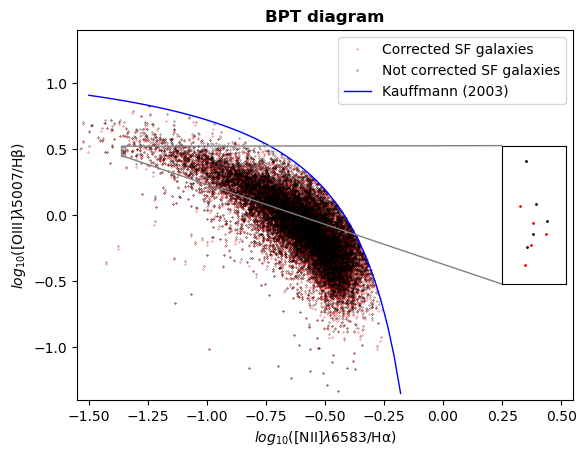

In [8]:
fig=figure()

#Figura principal
ax_main=fig.add_subplot(1,1,1)

#Plot de la figura principal
ax_main.plot(x_SFR_corrected,y_SFR_corrected,".",markersize=0.5,color="red",label="Corrected SF galaxies")
ax_main.plot(x_SFR,y_SFR,".",markersize=0.5,color="black",label="Not corrected SF galaxies")
ax_main.plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)", linewidth=1)

ax_main.set_xlabel("$log_{10}$([NII]$\lambda$6583/Hα)")
ax_main.set_ylabel("$log_{10}$([OIII]$\lambda$5007/Hβ)")
ax_main.set_title("BPT diagram", weight="bold")
ax_main.set_xlim(-1.55,0.55)
ax_main.set_ylim(-1.4,1.4)
ax_main.legend()

#Subfigura en una esquina
ax_inset=zoomed_inset_axes(ax_main,zoom=15,loc=7)  #crea el zoomed inset axes

#Plot de la subfigura en una esquina
ax_inset.plot(x_SFR_corrected,y_SFR_corrected,"o",markersize=1,color="red",label="Corrected SF galaxies")
ax_inset.plot(x_SFR,y_SFR,"o",markersize=1, color="black",label="Not corrected SF galaxies")

ax_inset.set_xlim(-1.363,-1.345)
ax_inset.set_ylim(0.45,0.52)

ax_inset.set_xticks([])
ax_inset.set_yticks([])

#Marcar el área de zoom en la figura principal
mark_inset(ax_main,ax_inset,loc1=2,loc2=3,fc="none",ec="0.5") 

#GUARDAR PLOT
#savefig("SF_galaxies_corrected.pdf",bbox_inches="tight") 
show()


In [134]:
#Seleccionamos flujos corregidos y observados de galaxias SF
x_SFR_observed=[]
x_SFR_corrected2=[]
y_SFR_observed=[]
y_SFR_corrected2=[]

for i in range(len(galaxy_type)):
    if galaxy_type[i]=="SF":
        x_SFR_corrected2.append(log10(FLUX_CORRECT_NII6583[i]/FLUX_CORRECT_Ha[i]))
        y_SFR_corrected2.append(log10(FLUX_CORRECT_OIII5007[i]/FLUX_CORRECT_Hb[i]))
        x_SFR_observed.append(log10(NII6583[i]/Ha[i]))
        y_SFR_observed.append(log10(OIII5007[i]/Hb[i]))


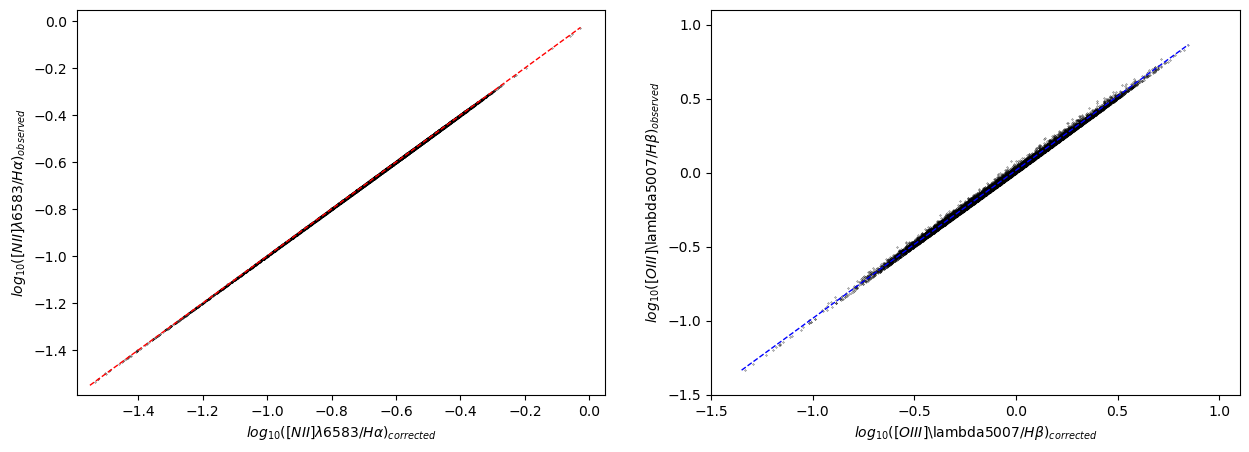

In [204]:
#Comaprativa entre ejes del diagrama BPT obersvados y corregidos
fig,(ax1,ax2)=subplots(1,2,figsize=(15,5))

ax1.plot(x_SFR_corrected2,x_SFR_observed,".",color="black",markersize=0.5)

ax1.set_xlim(-1.59,0.05)
ax1.set_ylim(-1.59,0.05)

#ax1.set_xlim(-1,-0.2)
#ax1.set_ylim(-1,-0.2)

ax1.set_xlabel("$log_{10}([NII]\lambda6583/H\u03B1)_{corrected}$")
ax1.set_ylabel("$log_{10}([NII]\lambda6583/H\u03B1)_{observed}$")

coefficients1=polyfit(x_SFR_corrected2,x_SFR_observed,1)
m1=coefficients1[0] 
b1=coefficients1[1] 

x_line1=linspace(-1.55,max(x_SFR_corrected2),100)
y_line1=m1*x_line1+b1

ax1.plot(x_line1,y_line1,"--",color="red",linewidth=1)

ax2.plot(y_SFR_corrected2,y_SFR_observed,".",color="black",markersize=0.5)

coefficients2=polyfit(y_SFR_corrected2,y_SFR_observed,1)
m2=coefficients2[0] 
b2=coefficients2[1] 

x_line2=linspace(-1.35,max(y_SFR_corrected2),100)
y_line2=m2*x_line2+b2

ax2.plot(x_line2,y_line2,"--",color="blue",linewidth=1)

ax2.set_xlim(-1.5,1.1)
ax2.set_ylim(-1.5,1.1)

#ax2.set_xlim(-1,0.8)
#ax2.set_ylim(-1,0.8)

ax2.set_xlabel("$log_{10}([OIII]$\lambda$5007/H\u03B2)_{corrected}$")
ax2.set_ylabel("$log_{10}([OIII]$\lambda$5007/H\u03B2)_{observed}$")

#GUARDAR PLOT
#savefig("comparation_correction.pdf",bbox_inches="tight")
show()


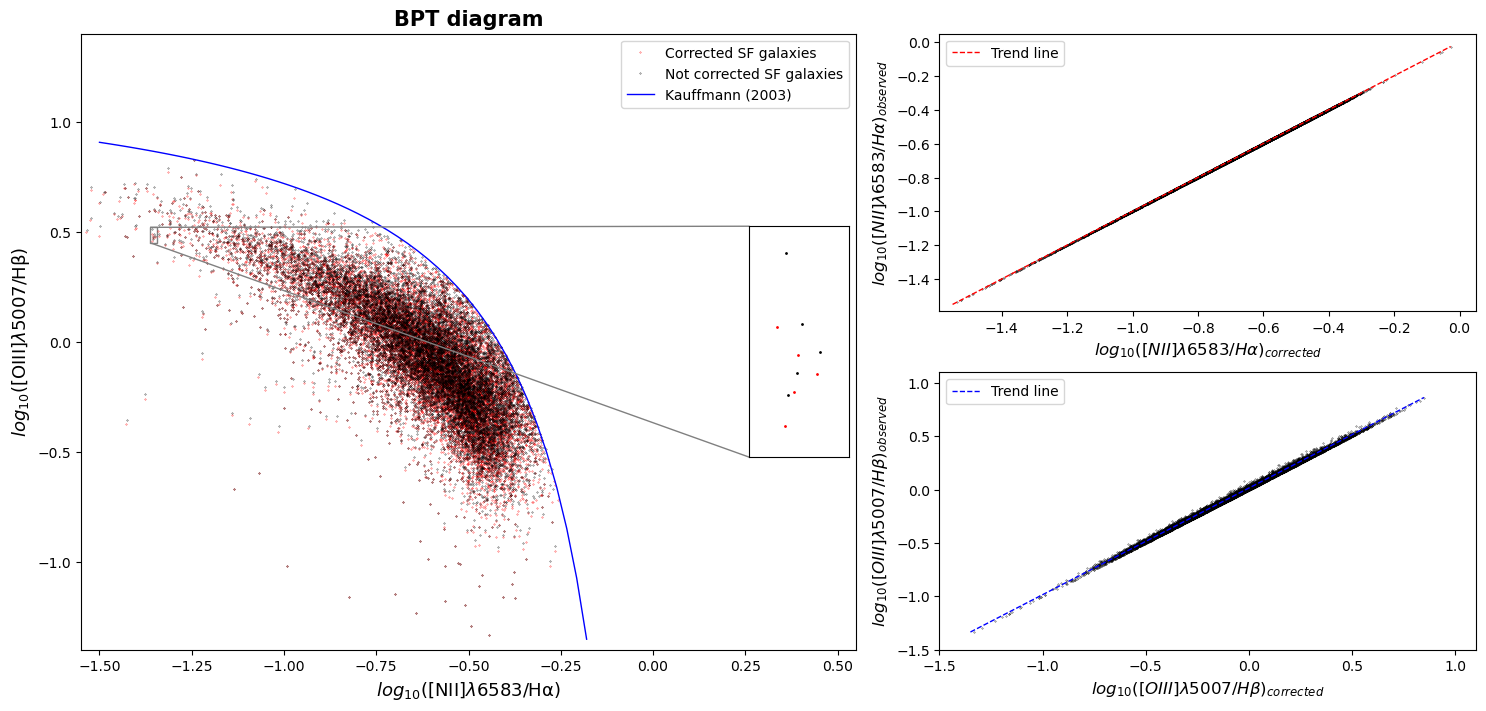

In [296]:
#Figura 1
fig=figure(figsize=(18,8))

#Figura principal
ax_main=fig.add_subplot(2,2,(1,3))
ax_main.plot(x_SFR_corrected,y_SFR_corrected,".",markersize=0.5,color="red",label="Corrected SF galaxies")
ax_main.plot(x_SFR,y_SFR, ".",markersize=0.5,color="black",label="Not corrected SF galaxies")
ax_main.plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1)
ax_main.set_xlabel("$log_{10}$([NII]$\lambda$6583/Hα)",fontsize=13)
ax_main.set_ylabel("$log_{10}$([OIII]$\lambda$5007/Hβ)",fontsize=13)
ax_main.set_title("BPT diagram", weight="bold",fontsize=15)
ax_main.set_xlim(-1.55, 0.55)
ax_main.set_ylim(-1.4, 1.4)
ax_main.legend()

#Subfigura
ax_inset=zoomed_inset_axes(ax_main, zoom=15, loc=7)
ax_inset.plot(x_SFR_corrected,y_SFR_corrected,"o", markersize=1,color="red",label="Corrected SF galaxies")
ax_inset.plot(x_SFR,y_SFR,"o",markersize=1,color="black",label="Not corrected SF galaxies")
ax_inset.set_xlim(-1.363,-1.345)
ax_inset.set_ylim(0.45, 0.52)
ax_inset.set_xticks([])
ax_inset.set_yticks([])
mark_inset(ax_main, ax_inset,loc1=2,loc2=3,fc="none",ec="0.5")

#Figura 2
ax2=fig.add_subplot(2,3,3) #222
ax2.plot(x_SFR_corrected2,x_SFR_observed,".",color="black",markersize=0.5)
ax2.set_xlim(-1.59,0.05)
ax2.set_ylim(-1.59,0.05)
ax2.set_xlabel("$log_{10}([NII]\lambda6583/Hα)_{corrected}$",fontsize=12)
ax2.set_ylabel("$log_{10}([NII]\lambda6583/Hα)_{observed}$",fontsize=12)
coefficients1 = polyfit(x_SFR_corrected2, x_SFR_observed,1)
m1=coefficients1[0]
b1=coefficients1[1]
x_line1=linspace(-1.55, max(x_SFR_corrected2),100)
y_line1=m1*x_line1+b1
ax2.plot(x_line1, y_line1,"--",color="red",linewidth=1,label="Trend line")
ax2.legend()

#Figura 3 
ax3=fig.add_subplot(2,3,6) #224
ax3.plot(y_SFR_corrected2, y_SFR_observed,".",color="black",markersize=0.5)
ax3.set_xlim(-1.5,1.1)
ax3.set_ylim(-1.5,1.1)
ax3.set_xlabel("$log_{10}([OIII]\lambda5007/Hβ)_{corrected}$",fontsize=12)
ax3.set_ylabel("$log_{10}([OIII]\lambda5007/Hβ)_{observed}$",fontsize=12)
coefficients2 = polyfit(y_SFR_corrected2,y_SFR_observed,1)
m2=coefficients2[0]
b2=coefficients2[1]
x_line2=linspace(-1.35,max(y_SFR_corrected2),100)
y_line2=m2*x_line2+b2
ax3.plot(x_line2,y_line2,"--",color="blue",linewidth=1,label="Trend line")
ax3.legend()

#Ajustar espaciado
fig.subplots_adjust(wspace=-0.2,hspace=0.22)

#GUARDAR PLOT
savefig("comparation_correction2.pdf",bbox_inches="tight")
show()


##  M-Z Relation

C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


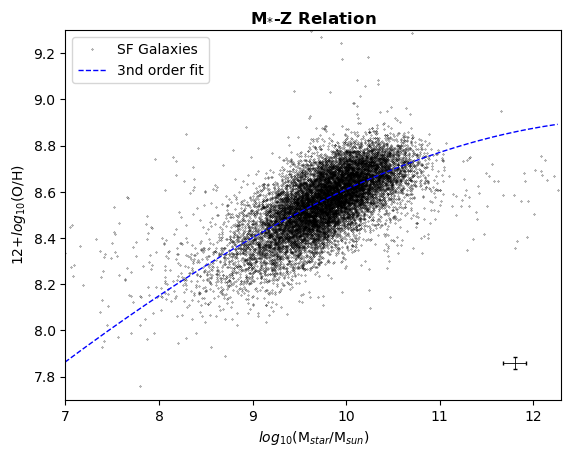

Coeficientes del ajuste: [-1.16349265e-03  1.04329863e-02  3.26303412e-01  5.46767976e+00]


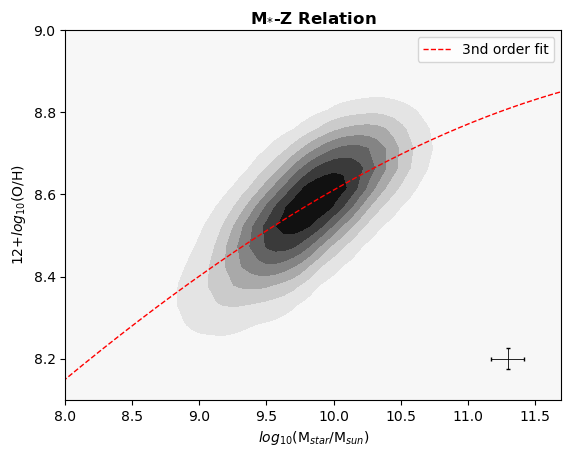

In [9]:
#METALICIDADES ------------------------------------------------------------------------------------------------------------------------

#O3N2
O3N2=log10((array(OIII5007_corrected)/array(Hb_corrected))/(array(NII6583_corrected)/array(Ha_corrected)))

#Calibration of Pettini & Pagel (2004)
PPO4=8.73-0.32*O3N2

#Seleccionamos el valor de PPO4 de sólo las galaxias SF
PPO4_SF=[]
logmstar_SF=[]
dellogmstar_SF=[]

AoN_Ha_SFR=[] #introducimos los AoN de aquellas galaxias por debajo de Kauffman (SFR)
AoN_Hb_SFR=[]
AoN_NII6583_SFR=[]
AoN_OIII5007_SFR=[]

for i in range(len(x_BPT_corrected)):
    if y_BPT_corrected[i]<=y_Kauffman_condition[i] and x_BPT_corrected[i]<=0 and logmstar_ok[i]!=-99:
        PPO4_SF.append(PPO4[i])
        logmstar_SF.append(logmstar_ok[i]) 
        dellogmstar_SF.append(dellogmstar_ok[i])
             
        AoN_Ha_SFR.append(AoN_Ha_ok[i])
        AoN_Hb_SFR.append(AoN_Hb_ok[i])
        AoN_NII6583_SFR.append(AoN_NII6583_ok[i])
        AoN_OIII5007_SFR.append(AoN_OIII5007_ok[i])

#Ploteamos M-Z Relation 
plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black",label="SF Galaxies")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS
p=polyfit(ravel(logmstar_SF),ravel(PPO4_SF),3) #calcula coeficientes del polinomio de orden 3
y_fit=polyval(p,ravel(logmstar_SF)) #crea función polinómica con los coeficientes obtenidos

#Calculamos pesos (necesarios para el ajuste polinomial)
w=[]
resid=[]
for m in range(len(y_fit)):
    resid.append(PPO4_SF[m]-y_fit[m])
    w.append(1/resid[m]**2)

#Ajuste por polinomios con w
p_w=polyfit(ravel(logmstar_SF),ravel(PPO4_SF),3,w=ravel(w)) #calcula coeficientes del polinomio de orden 3 con pesos (w)
y_fit_w=polyval(p_w,ravel(logmstar_SF)) #crea función polinómica con los coeficientes obtenidos con pesos (w)

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit",linewidth=1) #ajuste polinomial con pesos (w)
legend()

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

print("Coeficientes del ajuste:",p_w)

#DENSITY SCATTER PLOT
#Crea un objeto de densidad de kernel
kde=gaussian_kde([ravel(logmstar_SF),ravel(PPO4_SF)])

#Crea una cuadrícula de valores para el gráfico de contorno
xmin,ymin=min(logmstar_SF),min(PPO4_SF)
xmax,ymax=max(logmstar_SF),max(PPO4_SF)
xi,yi=mgrid[xmin:xmax:100j,ymin:ymax:100j]
zi=kde(vstack([xi.flatten(),yi.flatten()]))

#Crea el gráfico de densidad de puntos difuminados
contourf(xi,yi,zi.reshape(xi.shape),cmap="Greys")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(8,11.7)
ylim(8.1,9)

errorbar(11.3,8.2,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="red",label="3nd order fit",linewidth=1) #ajuste polinomial

legend()
#GUARDAR PLOT
#savefig("test2.pdf",bbox_inches="tight") 
show()


## Exporting some data to a DataFrame to work with it in R

En el próximo código vamos a exportar los datos que necesitamos para usar propagate en R. En concreto vamos a exportar las lineas de emisión corregidas de Ha, Hb, OIII y NII junto a logmstar como un DataFrame y luego a formato .txt para postriormente llamarlo con read.table() desde R. 

Importante no ejecutar el código de abajo repetidas veces ya que guarda los datos en .txt concretado cada vez que lo ejecutas!


In [10]:
#DATA FRAME DATOS PROPAGATE R----------------------------------------------------------------------------------------------

#DIAGRAMA BPT
data_frame_BPT=DataFrame(Ha_corrected,columns=["Ha"]) #DataFrame BPT con sólo datos de Ha
data_frame_BPT["Ha_Error"]=DataFrame(Ha_ok_Error) #añadimos errores Ha al DataFrame BPT

data_frame_BPT["Hb"]=DataFrame(Hb_corrected) #añadimos Hb al DataFrame BPT
data_frame_BPT["Hb_Error"]=DataFrame(Hb_ok_Error) #añadimos errores Hb al DataFrame BPT

data_frame_BPT["NII6583"]=DataFrame(NII6583_corrected) #añadimos NII6583 al DataFrame BPT
data_frame_BPT["NII6583_Error"]=DataFrame(NII6583_ok_Error) #añadimos errores NII6583 al DataFrame BPT

data_frame_BPT["OIII5007"]=DataFrame(OIII5007_corrected) #añadimos OIII5007 al DataFrame BPT
data_frame_BPT["OIII5007_Error"]=DataFrame(OIII5007_ok_Error) #añadimos errores OIII5007 al DataFrame BPT

#EXPORTAMOS el DataFrame a .txt (SÓLO UNA VEZ)
#path=r"C:\Users\juana\OneDrive\Escritorio\Juanan\UCM\TFG\MyJob\data_frame_BPT.txt" #donde lo exportamos

#with open(path,"a") as f: #exportación
    #data_frame_BPT_string=data_frame_BPT.to_string(header=False, index=False)
    #f.write(data_frame_BPT_string)
    
#DIAGRAMA BPT SF GALAXIES

data_frame_Metal=DataFrame(logmstar_SF,columns=["logmstar"]) #DataFrame BPT con sólo datos de logmstar para las galaxias SF
data_frame_Metal["PPO4_SF"]=DataFrame(PPO4_SF) #añadimos PPO4_SF al data_frame_Metal

#EXPORTAMOS el DataFrame a .txt (SÓLO UNA VEZ)
#path=r"C:\Users\juana\OneDrive\Escritorio\Juanan\UCM\TFG\MyJob\data_frame_Metal.txt" #donde lo exportamos

#with open(path,"a") as f: #exportación
    #data_frame_Metal_string=data_frame_Metal.to_string(header=False, index=False)
    #f.write(data_frame_Metal_string)

## Galaxies Classification

In [11]:
#CLASIFICACION DE GALAXIAS-------------------------------------------------------------------------------------------------

selected_galaxies=[]
galaxy_type=[]
FLUX_CORRECT_Ha=[]
FLUX_CORRECT_Hb=[]
FLUX_CORRECT_NII6583=[]
FLUX_CORRECT_OIII5007=[]
metal_PPO4=[]

for i in range(len(Ha)): #condiciones de filtrado
    if Ha[i]>0 and Ha[i]!=inf and Hb[i]>0 and Hb[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and OIII5007[i]>0 and OIII5007[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_Hb[i]>2 and AoN_OIII5007[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and Hb_Error[i]>=0 and Hb_Error[i]!=inf and OIII5007_Error[i]>=0 and OIII5007_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf:  
        
        #Clasificadas
        selected_galaxies.append(1)
        
        if y_BPT[i-selected_galaxies.count(0)]<=y_Kauffman_condition[i-selected_galaxies.count(0)] and x_BPT[i-selected_galaxies.count(0)]<=0:
            
            galaxy_type.append("SF") #Clasificamos SF
            
            FLUX_CORRECT_Ha.append(Ha_corrected[i-selected_galaxies.count(0)]) #añadimos flujos corregidos por extinción a las SF
            FLUX_CORRECT_Hb.append(Hb_corrected[i-selected_galaxies.count(0)])
            FLUX_CORRECT_NII6583.append(NII6583_corrected[i-selected_galaxies.count(0)])
            FLUX_CORRECT_OIII5007.append(OIII5007_corrected[i-selected_galaxies.count(0)])
            
            metal_PPO4.append(PPO4[i-selected_galaxies.count(0)]) #añadimos metalicidades calculadas a las SF
            
        elif y_BPT[i-selected_galaxies.count(0)]<=y_Kewley_condition[i-selected_galaxies.count(0)] and y_BPT[i-selected_galaxies.count(0)]>y_Kauffman_condition[i-selected_galaxies.count(0)]:
            
            galaxy_type.append("Composite") #clasificamos Composites
            
            FLUX_CORRECT_Ha.append(-999) #Asignamos -999 a los flujos corregido de las galaxias que no son SF
            FLUX_CORRECT_Hb.append(-999) 
            FLUX_CORRECT_NII6583.append(-999)
            FLUX_CORRECT_OIII5007.append(-999)
            
            metal_PPO4.append(-999) #Asignamos a las metalicidades de las galaxias que no son SF
            
        elif y_BPT[i-selected_galaxies.count(0)]>y_Kewley_condition[i-selected_galaxies.count(0)]:
            
            galaxy_type.append("AGN") #Clasificamos AGN
            
            FLUX_CORRECT_Ha.append(-999) #Asignamos -999 a los flujos corregido de las galaxias que no son SF
            FLUX_CORRECT_Hb.append(-999) 
            FLUX_CORRECT_NII6583.append(-999)
            FLUX_CORRECT_OIII5007.append(-999)
            
            metal_PPO4.append(-999) #Asignamos a las metalicidades de las galaxias que no son SF
            
        else:
            galaxy_type.append("Composite") #Clasificiamos las restantes como Composites
            
            FLUX_CORRECT_Ha.append(-999) #Asignamos -999 a los flujos corregido de las galaxias que no son SF
            FLUX_CORRECT_Hb.append(-999) 
            FLUX_CORRECT_NII6583.append(-999)
            FLUX_CORRECT_OIII5007.append(-999)
            
            metal_PPO4.append(-999) #Asignamos a las metalicidades de las galaxias que no son SF
            
    else:
        
        #No clasificadas
        selected_galaxies.append(0) #Asignamos 0 a las galaxias que no pasaron el filtro
        
        galaxy_type.append("Not classified") #Asignamos 0 al tipo de galaxias que no pasaron el filtro
        
        FLUX_CORRECT_Ha.append(-999) #Asignamos -999 a los flujos corregidos de las galaxias que no pasaron el filtro
        FLUX_CORRECT_Hb.append(-999) 
        FLUX_CORRECT_NII6583.append(-999)
        FLUX_CORRECT_OIII5007.append(-999)
        
        metal_PPO4.append(-999) #Asignamos a las metalicidades de las galaxias que no pasaron el filtro        

#Para transformar todos los elementos de estas listas que sean ndarray a numeros (para que se impriman bien)
FLUX_CORRECT_Ha=[elemento[0] if isinstance(elemento,ndarray) else elemento for elemento in FLUX_CORRECT_Ha]
FLUX_CORRECT_Hb=[elemento[0] if isinstance(elemento,ndarray) else elemento for elemento in FLUX_CORRECT_Hb]
FLUX_CORRECT_NII6583=[elemento[0] if isinstance(elemento,ndarray) else elemento for elemento in FLUX_CORRECT_NII6583]
FLUX_CORRECT_OIII5007=[elemento[0] if isinstance(elemento,ndarray) else elemento for elemento in FLUX_CORRECT_OIII5007]
metal_PPO4=[elemento[0] if isinstance(elemento,ndarray) else elemento for elemento in metal_PPO4]      
        
print("Selected Galaxies:             ",selected_galaxies[145:150],len(selected_galaxies))
print("Galaxy Type:                   ",galaxy_type[145:150],len(galaxy_type))
print("Flux Correct Ha Galaxies:      ",FLUX_CORRECT_Ha[145:150],len(FLUX_CORRECT_Ha))
print("Metallicities Galaxies:        ",metal_PPO4[145:150],len(metal_PPO4))


C:\Users\juana\AppData\Local\Temp\ipykernel_14204\1294189438.py:12: RuntimeWarning: invalid value encountered in greater
  if Ha[i]>0 and Ha[i]!=inf and Hb[i]>0 and Hb[i]!=inf and NII6583[i]>0 and NII6583[i]!=inf and OIII5007[i]>0 and OIII5007[i]!=inf and redshift[i]<0.3 and AoN_Ha[i]>3 and AoN_Hb[i]>2 and AoN_OIII5007[i]>3 and AoN_NII6583[i]>2 and Ha_Error[i]>=0 and Ha_Error[i]!=inf and Hb_Error[i]>=0 and Hb_Error[i]!=inf and OIII5007_Error[i]>=0 and OIII5007_Error[i]!=inf and NII6583_Error[i]>=0 and NII6583_Error[i]!=inf:


Selected Galaxies:              [0, 0, 0, 0, 1] 192545
Galaxy Type:                    ['Not classified', 'Not classified', 'Not classified', 'Not classified', 'SF'] 192545
Flux Correct Ha Galaxies:       [-999, -999, -999, -999, 97.341194] 192545
Metallicities Galaxies:         [-999, -999, -999, -999, 8.546390614205054] 192545


## Add columns to our .fit data file

In [12]:
#Abrir el archivo FITS
#with fits.open("GANDALF_MASAS_COORDENADAS.fits",mode="append") as hdul:
    # Definir los datos de las nuevas columnas
    #col0_data=selected_galaxies #galaxias seleccionadas (0 no seleccionada, 1 seleccionada)
    #col1_data=galaxy_type #tipos de galaxias (A->AGN; S->SFR; C->Composites ;N->Not Classified)
    
    #col2_data=FLUX_CORRECT_Ha #flujos corregidos por extinción
    #col3_data=FLUX_CORRECT_Hb
    #col4_data=FLUX_CORRECT_NII6583
    #col5_data=FLUX_CORRECT_OIII5007
    
    #col6_data=metal_PPO4 #metalicidades (método Patini PP4)
    
    #Crear objetos fits.ColDefs para las nuevas columnas (A->flotante con signo; D->caracteres ASCII)
    #col0=fits.ColDefs([fits.Column(name="SELECTED_GALAXIES",format="D",array=col0_data)])
    #col1=fits.ColDefs([fits.Column(name="GALAXY_TYPE",format="A",array=col1_data)])
    #col2=fits.ColDefs([fits.Column(name="FLUX_CORRECT_Ha",format="D",array=col2_data)])
    #col3=fits.ColDefs([fits.Column(name="FLUX_CORRECT_Hb",format="D",array=col3_data)])
    #col4=fits.ColDefs([fits.Column(name="FLUX_CORRECT_NII6583",format="D",array=col4_data)])
    #col5=fits.ColDefs([fits.Column(name="FLUX_CORRECT_OIII5007",format="D",array=col5_data)])
    #col6=fits.ColDefs([fits.Column(name="METAL_PPO4",format="D",array=col6_data)])
    
    #Crear un nuevo objeto fits.BinTableHDU que contenga las nuevas columnas
    #new_hdu=fits.BinTableHDU.from_columns(hdul[1].columns+col0+col1+col2+col3+col4+col5+col6)
    
    #Agregar el nuevo objeto fits.BinTableHDU al archivo FITS
    #hdul.append(new_hdu)
    
    #Guardar los cambios en el archivo FITS
    #hdul.flush()


## We print columns names with our new columns

In [13]:
#Comprobamos columnas
print(datos.columns.names)

['FILENAME', 'CATA', 'RA_1', 'DEC_1', 'FLUX_1', 'FLUX_2', 'FLUX_3', 'FLUX_4', 'FLUX_5', 'FLUX_6', 'FLUX_7', 'FLUX_8', 'FLUX_9', 'FLUX_10', 'FLUX_11', 'FLUX_12', 'FLUX_13', 'FLUX_14', 'FLUX_15', 'FLUX_16', 'FLUX_17', 'FLUX_18', 'FLUX_19', 'FLUX_20', 'FLUX_21', 'FLUX_22', 'FLUX_23', 'FLUX_24', 'FLUX_25', 'FLUX_26', 'FLUX_27', 'FLUX_ERROR_1', 'FLUX_ERROR_2', 'FLUX_ERROR_3', 'FLUX_ERROR_4', 'FLUX_ERROR_5', 'FLUX_ERROR_6', 'FLUX_ERROR_7', 'FLUX_ERROR_8', 'FLUX_ERROR_9', 'FLUX_ERROR_10', 'FLUX_ERROR_11', 'FLUX_ERROR_12', 'FLUX_ERROR_13', 'FLUX_ERROR_14', 'FLUX_ERROR_15', 'FLUX_ERROR_16', 'FLUX_ERROR_17', 'FLUX_ERROR_18', 'FLUX_ERROR_19', 'FLUX_ERROR_20', 'FLUX_ERROR_21', 'FLUX_ERROR_22', 'FLUX_ERROR_23', 'FLUX_ERROR_24', 'FLUX_ERROR_25', 'FLUX_ERROR_26', 'FLUX_ERROR_27', 'FLUX_OBS_1', 'FLUX_OBS_2', 'FLUX_OBS_3', 'FLUX_OBS_4', 'FLUX_OBS_5', 'FLUX_OBS_6', 'FLUX_OBS_7', 'FLUX_OBS_8', 'FLUX_OBS_9', 'FLUX_OBS_10', 'FLUX_OBS_11', 'FLUX_OBS_12', 'FLUX_OBS_13', 'FLUX_OBS_14', 'FLUX_OBS_Hb', 'FLUX_OB

## We attach data Filaments, Void and Tendrils

Ahora procedemos a trabajar con el catágolo anterior "matcheado" con el de FilGroups y el de FilVoid.

In [14]:
#Adjuntamos Datos de galaxias en FILAMENTOS
FITS=fits.open(".\\Catálogos\\GANDALF_FilGroups.fits") #lee .fits
fil=FITS[1].data #datos FilGals 
#Adjuntamos Datos de VOID galaxies
FITS=fits.open(".\\Catálogos\\GANDALF_VoidGals.fits") #lee .fits
void=FITS[1].data #datos VoidGals
#Adjuntamos Datos de TENDRILS galaxies
FITS=fits.open(".\\Catálogos\\GANDALF_TendrilGals.fits") #lee .fits
tendril=FITS[1].data #datos TendrilGals


## Void Metallicities

C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


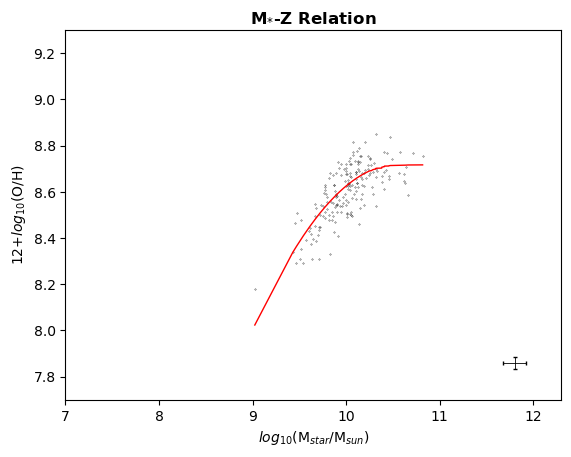

Coeficientes del ajuste: [-0.01529807  0.15736468  1.77898372 -9.60284053]


In [15]:
#METALICIDADES VOID------------------------------------------------------------------------------------------------------------------------

#O3N2
O3N2_void=log10((array(void["FLUX_CORRECT_OIII5007"])/array(void["FLUX_CORRECT_Hb"]))/(array(void["FLUX_CORRECT_NII6583"])/array(void["FLUX_CORRECT_Ha"])))

#Calibration of Pettini & Pagel (2004)
PPO4_void=8.73-0.32*O3N2_void

#Seleccionamos el valor de PPO4 de sólo las galaxias SF
PPO4_SF_void=[]
logmstar_SF_void=[]
dellogmstar_SF_void=[]

for i in range(len(void["FLUX_CORRECT_Ha"])):
    if void["GALAXY_TYPE"][i]=="S" and void["logmstar"][i]!=-99:
        PPO4_SF_void.append(PPO4_void[i])
        logmstar_SF_void.append(void["logmstar"][i]) 
        dellogmstar_SF_void.append(void["dellogmstar"][i])

#Ploteamos M-Z Relation 
plot(logmstar_SF_void,PPO4_SF_void,".",markersize=0.5,color="black",label="Void SF galaxies")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_void),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS
p_void=polyfit(ravel(logmstar_SF_void),ravel(PPO4_SF_void),3) #calcula coeficientes del polinomio de orden 3
y_fit_void=polyval(p_void,ravel(logmstar_SF_void)) #crea función polinómica con los coeficientes obtenidos

#Calculamos pesos (necesarios para el ajuste polinomial)
w_void=[]
resid_void=[]
for m in range(len(y_fit_void)):
    resid_void.append(PPO4_SF_void[m]-y_fit_void[m])
    w_void.append(1/resid_void[m]**2)

#Ajuste por polinomios con w
p_w_void=polyfit(ravel(logmstar_SF_void),ravel(PPO4_SF_void),3,w=ravel(w_void)) #calcula coeficientes del polinomio de orden 3 con pesos (w)
y_fit_w_void=polyval(p_w_void,ravel(logmstar_SF_void)) #crea función polinómica con los coeficientes obtenidos con pesos (w)

plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"-",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

print("Coeficientes del ajuste:",p_w_void)


## Filaments Metallicities

C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


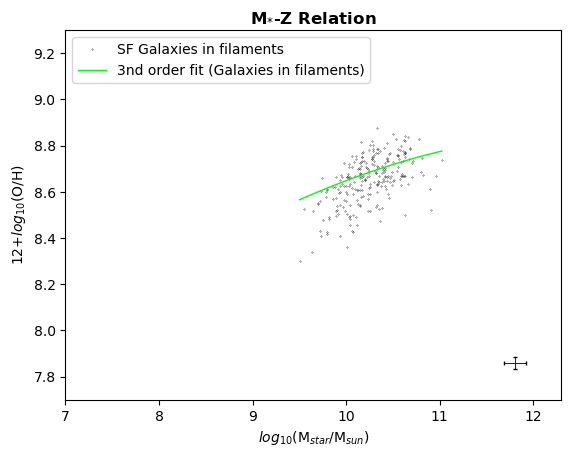

Coeficientes del ajuste: [-1.18399208e-03  9.33075279e-03  3.21861295e-01  5.68065239e+00]


In [16]:
#METALICIDADES FILAMENTS------------------------------------------------------------------------------------------------------------------------

#O3N2
O3N2_fil=log10((array(fil["FLUX_CORRECT_OIII5007"])/array(fil["FLUX_CORRECT_Hb"]))/(array(fil["FLUX_CORRECT_NII6583"])/array(fil["FLUX_CORRECT_Ha"])))

#Calibration of Pettini & Pagel (2004)
PPO4_fil=8.73-0.32*O3N2_fil

#Seleccionamos el valor de PPO4 de sólo las galaxias SF
PPO4_SF_fil=[]
logmstar_SF_fil=[]
dellogmstar_SF_fil=[]

for i in range(len(fil["FLUX_CORRECT_Ha"])):
    if fil["GALAXY_TYPE"][i]=="S" and fil["logmstar"][i]!=-99:
        PPO4_SF_fil.append(PPO4_fil[i])
        logmstar_SF_fil.append(fil["logmstar"][i]) 
        dellogmstar_SF_fil.append(fil["dellogmstar"][i])

#Ploteamos M-Z Relation 
plot(logmstar_SF_fil,PPO4_SF_fil,".",markersize=0.5,color="black",label="SF Galaxies in filaments")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_fil),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS
p_fil=polyfit(ravel(logmstar_SF_fil),ravel(PPO4_SF_fil),3) #calcula coeficientes del polinomio de orden 3
y_fit_fil=polyval(p_fil,ravel(logmstar_SF_fil)) #crea función polinómica con los coeficientes obtenidos

#Calculamos pesos (necesarios para el ajuste polinomial)
w_fil=[]
resid_fil=[]
for m in range(len(y_fit_fil)):
    resid_fil.append(PPO4_SF_fil[m]-y_fit_fil[m])
    w_fil.append(1/resid_fil[m]**2)

#Ajuste por polinomios con w
p_w_fil=polyfit(ravel(logmstar_SF_fil),ravel(PPO4_SF_fil),3,w=ravel(w_fil)) #calcula coeficientes del polinomio de orden 3 con pesos (w)
y_fit_w_fil=polyval(p_w_fil,ravel(logmstar_SF_fil)) #crea función polinómica con los coeficientes obtenidos con pesos (w)

plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"-",color="lime",label="3nd order fit (Galaxies in filaments)",linewidth=1) #ajuste polinomial con pesos (w)
legend()

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

print("Coeficientes del ajuste:",p_w_fil)

## Tendrils Metallicities

C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\juana\anaconda3\envs\Python_and_R\lib\site-packages\IPython\core\interactiveshell.py:3505: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


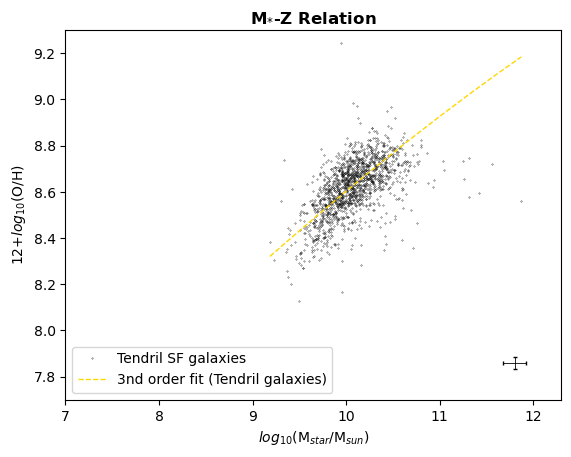

Coeficientes del ajuste: [-8.67290196e-04  1.35850339e-02  3.25546875e-01  4.85603952e+00]


In [17]:
## METALICIDADES TENDRILS------------------------------------------------------------------------------------------------------------------------

#O3N2
O3N2_tendril=log10((array(tendril["FLUX_CORRECT_OIII5007"])/array(tendril["FLUX_CORRECT_Hb"]))/(array(tendril["FLUX_CORRECT_NII6583"])/array(tendril["FLUX_CORRECT_Ha"])))

#Calibration of Pettini & Pagel (2004)
PPO4_tendril=8.73-0.32*O3N2_tendril

#Seleccionamos el valor de PPO4 de sólo las galaxias SF
PPO4_SF_tendril=[]
logmstar_SF_tendril=[]
dellogmstar_SF_tendril=[]

for i in range(len(tendril["FLUX_CORRECT_Ha"])):
    if tendril["GALAXY_TYPE"][i]=="S" and tendril["logmstar"][i]!=-99:
        PPO4_SF_tendril.append(PPO4_tendril[i])
        logmstar_SF_tendril.append(tendril["logmstar"][i]) 
        dellogmstar_SF_tendril.append(tendril["dellogmstar"][i])

#Ploteamos M-Z Relation 
plot(logmstar_SF_tendril,PPO4_SF_tendril,".",markersize=0.5,color="black",label="Tendril SF galaxies")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_tendril),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS
p_tendril=polyfit(ravel(logmstar_SF_tendril),ravel(PPO4_SF_tendril),3) #calcula coeficientes del polinomio de orden 3
y_fit_tendril=polyval(p_tendril,ravel(logmstar_SF_tendril)) #crea función polinómica con los coeficientes obtenidos

#Calculamos pesos (necesarios para el ajuste polinomial)
w_tendril=[]
resid_tendril=[]
for m in range(len(y_fit_tendril)):
    resid_tendril.append(PPO4_SF_tendril[m]-y_fit_tendril[m])
    w_tendril.append(1/resid_tendril[m]**2)

#Ajuste por polinomios con w
p_w_tendril=polyfit(ravel(logmstar_SF_tendril),ravel(PPO4_SF_tendril),3,w=ravel(w_tendril)) #calcula coeficientes del polinomio de orden 3 con pesos (w)
y_fit_w_tendril=polyval(p_w_tendril,ravel(logmstar_SF_tendril)) #crea función polinómica con los coeficientes obtenidos con pesos (w)

plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="gold",label="3nd order fit (Tendril galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
legend()

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

print("Coeficientes del ajuste:",p_w_tendril)

## All the metallicities with their fits

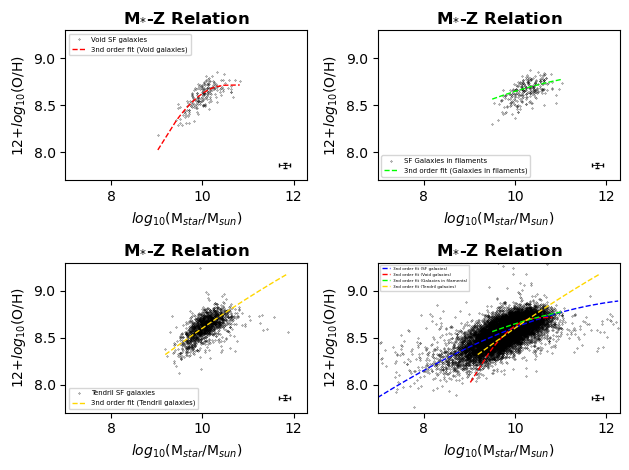

In [18]:
fig,axs=subplots(2,2) #juntar grafiguras en una figura

#Ploteamos M-Z Relation (VOID GALAXIES)
axs[0,0].plot(logmstar_SF_void,PPO4_SF_void,".",markersize=0.5,color="black",label="Void SF galaxies")

axs[0,0].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[0,0].set_ylabel("12+$log_{10}$(O/H)")
axs[0,0].set_title("M$_{*}$-Z Relation",weight="bold")

axs[0,0].set_xlim(7,12.3)
axs[0,0].set_ylim(7.7,9.3)

axs[0,0].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_void),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[0,0].plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"--",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[0,0].legend(fontsize=5)

#Ploteamos M-Z Relation (TEDNRIL GALAXIES)
axs[1,0].plot(logmstar_SF_tendril,PPO4_SF_tendril,".",markersize=0.5,color="black",label="Tendril SF galaxies")

axs[1,0].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[1,0].set_ylabel("12+$log_{10}$(O/H)")
axs[1,0].set_title("M$_{*}$-Z Relation",weight="bold")

axs[1,0].set_xlim(7,12.3)
axs[1,0].set_ylim(7.7,9.3)

axs[1,0].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_tendril),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[1,0].plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="gold",label="3nd order fit (Tendril galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,0].legend(fontsize=5)

#Ploteamos M-Z Relation (GALAXIES IN FILAMENTS)
axs[0,1].plot(logmstar_SF_fil,PPO4_SF_fil,".",markersize=0.5,color="black",label="SF Galaxies in filaments")

axs[0,1].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[0,1].set_ylabel("12+$log_{10}$(O/H)")
axs[0,1].set_title("M$_{*}$-Z Relation",weight="bold")

axs[0,1].set_xlim(7,12.3)
axs[0,1].set_ylim(7.7,9.3)

axs[0,1].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_fil),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[0,1].plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"--",color="lime",label="3nd order fit (Galaxies in filaments)",linewidth=1) #ajuste polinomial con pesos (w)
axs[0,1].legend(fontsize=5)

#Ploteamos M-Z Relation (SF GALAXIES)
axs[1,1].plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black")

axs[1,1].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[1,1].set_ylabel("12+$log_{10}$(O/H)")
axs[1,1].set_title("M$_{*}$-Z Relation",weight="bold")

axs[1,1].set_xlim(7,12.3)
axs[1,1].set_ylim(7.7,9.3)

axs[1,1].errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[1,1].plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,1].plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"--",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,1].plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"--",color="lime",label="3nd order fit (Galaxies in filaments)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,1].plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="gold",label="3nd order fit (Tendril galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,1].legend(fontsize=3)

fig.tight_layout() #ajustar figuras

#GUARDAR PLOT
#savefig("metalicidades.pdf",bbox_inches="tight") 
show()


## Metallicities

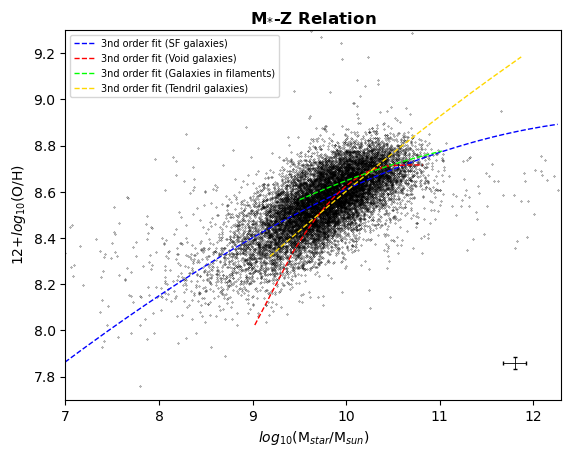

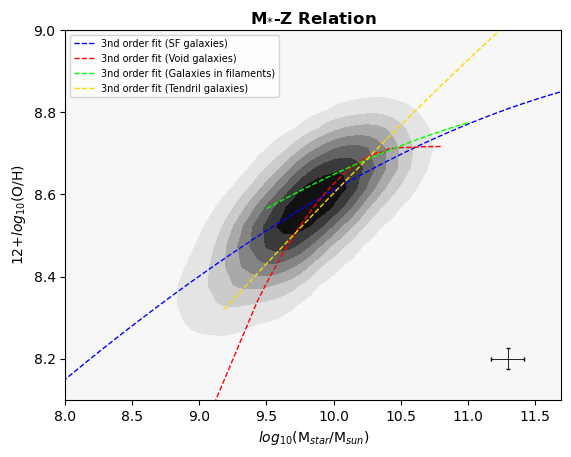

In [19]:
#Ploteamos M-Z Relation 
plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"--",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"--",color="lime",label="3nd order fit (Galaxies in filaments)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="gold",label="3nd order fit (Tendril galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
legend(fontsize=7)

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

#Crea el gráfico de densidad de puntos difuminados
contourf(xi,yi,zi.reshape(xi.shape),cmap="Greys")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(8,11.7)
ylim(8.1,9)

errorbar(11.3,8.2,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"--",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"--",color="lime",label="3nd order fit (Galaxies in filaments)",linewidth=1) #ajuste polinomial con pesos (w)
plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="gold",label="3nd order fit (Tendril galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
legend(fontsize=7)

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

## Residuals

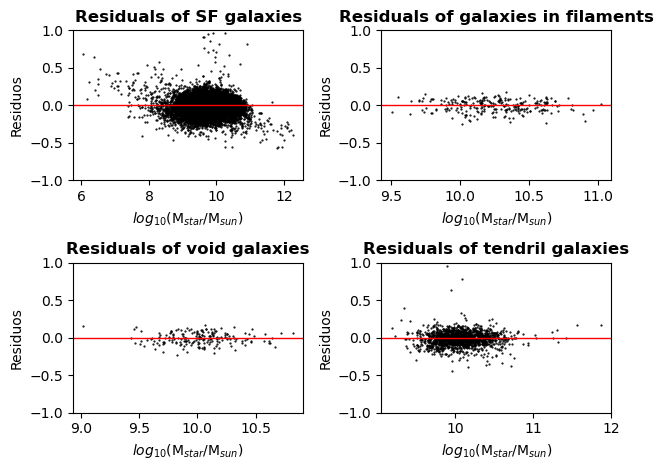

In [20]:
fig,axs=subplots(2,2) #juntar grafiguras en una figura

#Residuos Galaxias SF
axs[0,0].scatter(ravel(logmstar_SF),resid,s=0.3,color="black")
axs[0,0].axhline(y=0,color="red",linestyle="-",linewidth=1)
axs[0,0].set_title("Residuals of SF galaxies",weight="bold")
axs[0,0].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[0,0].set_ylabel("Residuos")
axs[0,0].set_ylim(-1,1)

#Residuos Void Galaxies
axs[1,0].scatter(ravel(logmstar_SF_void),resid_void,s=0.3,color="black")
axs[1,0].axhline(y=0,color="red",linestyle="-",linewidth=1)
axs[1,0].set_title("Residuals of void galaxies",weight="bold")
axs[1,0].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[1,0].set_ylabel("Residuos")
axs[1,0].set_ylim(-1,1)

#Residuos Galaxies in Filaments
axs[0,1].scatter(ravel(logmstar_SF_fil),resid_fil,s=0.3,color="black")
axs[0,1].axhline(y=0,color="red",linestyle="-",linewidth=1)
axs[0,1].set_title("Residuals of galaxies in filaments",weight="bold")
axs[0,1].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[0,1].set_ylabel("Residuos")
axs[0,1].set_ylim(-1,1)

#Reisudos Tendril Galaxies
axs[1,1].scatter(ravel(logmstar_SF_tendril),resid_tendril,s=0.3,color="black")
axs[1,1].axhline(y=0,color="red",linestyle="-",linewidth=1)
axs[1,1].set_title("Residuals of tendril galaxies",weight="bold")
axs[1,1].set_xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
axs[1,1].set_ylabel("Residuos")
axs[1,1].set_ylim(-1,1)

fig.tight_layout() #ajustar figuras

#GUARDAR PLOT
#savefig("residuals.pdf",bbox_inches="tight") 
show()

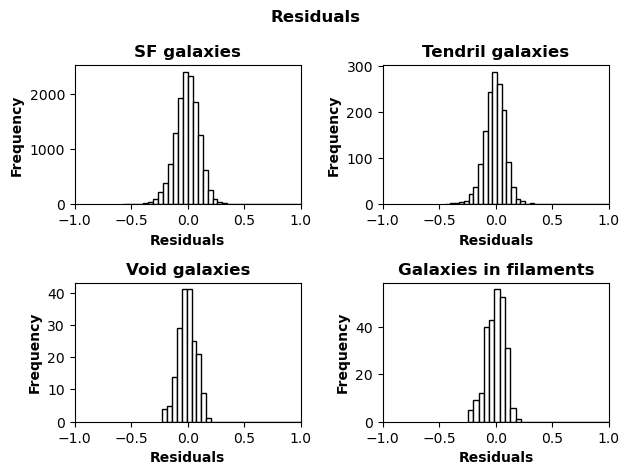

In [21]:
fig,axs=subplots(2,2) #juntar grafiguras en una figura
fig.suptitle("Residuals",weight="bold")
#fig=figure(figsize=(3.6,4))

#Residuos Galaxias SF
axs[0,0].hist(ravel(resid),bins=100,density=False,edgecolor="black",color="white")
axs[0,0].set_title("SF galaxies",weight="bold")
axs[0,0].set_xlabel("Residuals",weight="bold")
axs[0,0].set_ylabel("Frequency",weight="bold")
axs[0,0].set_xlim(-1,1)

#Residuos Tendril Galaxias 
axs[0,1].hist(ravel(resid_tendril),bins=100,density=False,edgecolor="black",color="white")
axs[0,1].set_title("Tendril galaxies",weight="bold")
axs[0,1].set_xlabel("Residuals",weight="bold")
axs[0,1].set_ylabel("Frequency",weight="bold")
axs[0,1].set_xlim(-1,1)

#Residuos Void Galaxies
axs[1,0].hist(ravel(resid_void),bins=40,density=False,edgecolor="black",color="white")
axs[1,0].set_title("Void galaxies",weight="bold")
axs[1,0].set_xlabel("Residuals",weight="bold")
axs[1,0].set_ylabel("Frequency",weight="bold")
axs[1,0].set_xlim(-1,1)

#Residuos Galaxias in Filaments
axs[1,1].hist(ravel(resid_fil),bins=35,density=False,edgecolor="black",color="white")
axs[1,1].set_title("Galaxies in filaments",weight="bold")
axs[1,1].set_xlabel("Residuals",weight="bold")
axs[1,1].set_ylabel("Frequency",weight="bold")
axs[1,1].set_xlim(-1,1)

fig.tight_layout() #ajustar figuras

#GUARDAR PLOT
#savefig("Residuals.pdf",bbox_inches="tight") 
show()

## We plot in red the galaxies with high S/N (outliers)

Vamos a ver que le pasan a esas galaxias que tienen comportamientos raros (altas metalicidades, altos flujos e el diagrama BPT) ya que pueden ser medidas erroneas que empeoran los ajustes hechos con anterioridad.

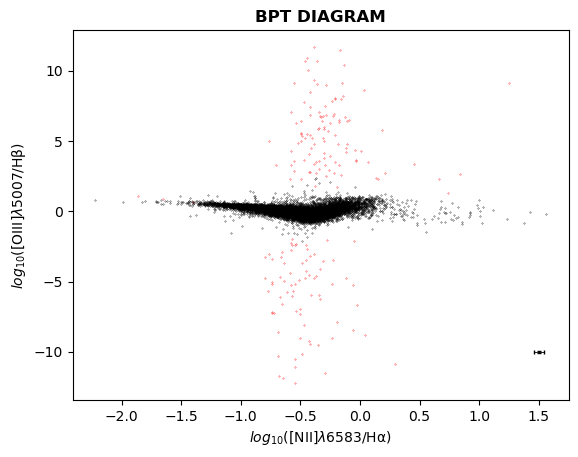

In [22]:
for i in range(len(x_BPT)):
    if AoN_Ha_ok[i]>1000 or AoN_Hb_ok[i]>1000 or AoN_NII6583_ok[i]>1000 or AoN_OIII5007_ok[i]>1000:
        plot(x_BPT[i],y_BPT[i],".",markersize=0.5,color="red")
        
    else:
        plot(x_BPT[i],y_BPT[i],".",markersize=0.5,color="black")

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT DIAGRAM",weight="bold")

#xlim(-1.2,0.2)
#ylim(-1,0.75)
errorbar(1.5,-10,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

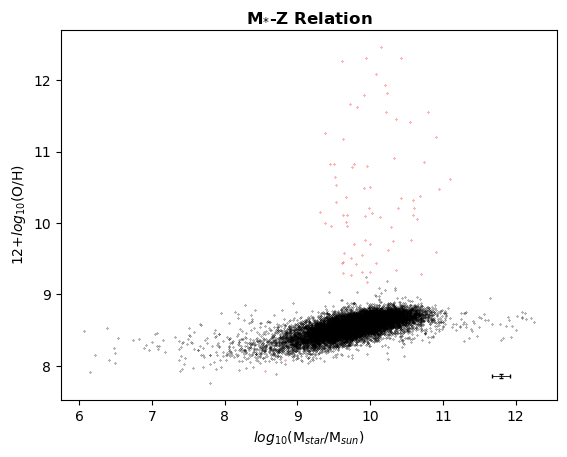

In [23]:
for i in range(len(logmstar_SF)):
    if AoN_Ha_SFR[i]>1000 or AoN_Hb_SFR[i]>1000 or AoN_NII6583_SFR[i]>1000 or AoN_OIII5007_SFR[i]>1000:
        plot(logmstar_SF[i],PPO4_SF[i],".",markersize=0.5,color="red")
    else:
        plot(logmstar_SF[i],PPO4_SF[i],".",markersize=0.5,color="black")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#GUARDAR PLOT
#savefig("test3.pdf",bbox_inches="tight") 
show()

## We add the CATAID of the outlier galaxies in a DataFrame

In [24]:
CATAID_rare=[] #adjuntamos el CATAID de las galaxias con algún AoN>200 (no son todas las outliers necesariamente)

for i in range(len(AoN_Ha)):
    if datos["SELECTED_GALAXIES"][i]==1:
        if datos["AON_24"][i]>200 or datos["AON_15"][i]>200 or datos["AON_25"][i]>200 or datos["AON_17"][i]>200:
            CATAID_rare.append(datos["CATAID_1"][i])

data_frame_CATAID_outliers=DataFrame(CATAID_rare,columns=["outliers galaxies"]) #DataFrame BPT con CATAID de los outliers

#EXPORTAMOS el DataFrame a .txt (SÓLO UNA VEZ)
#path=r"C:\Users\juana\OneDrive\Escritorio\Juanan\UCM\TFG\MyJob\data_frame_CATAID_outliers.txt" #donde lo exportamos

#with open(path,"a") as f: #exportación
    #data_frame_CATAID_outliers_string=data_frame_CATAID_outliers.to_string(header=False,index=False)
    #f.write(data_frame_CATAID_outliers_string)

## Metallicities Voids with fixed coefficients a, b, and c

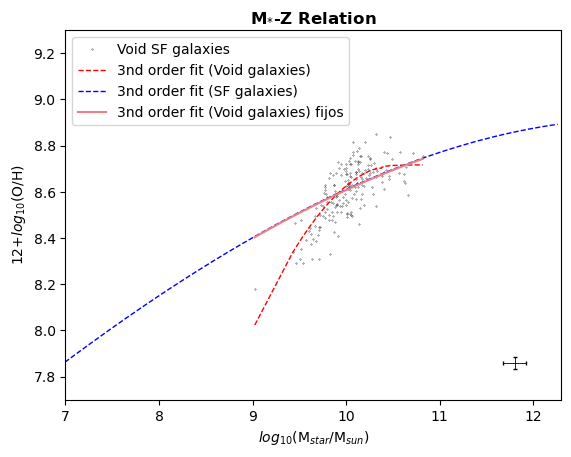

Coeficientes SF:  [-1.16349265e-03  1.04329863e-02  3.26303412e-01  5.46767976e+00]
Coeficientes Void:  [-0.01529807  0.15736468  1.77898372 -9.60284053]
Coeficiente d Void Fijos:  [5.46453849]


In [25]:
#PLOTEAMOS M-Z RELATION VOIDS
plot(logmstar_SF_void,PPO4_SF_void,".",markersize=0.5,color="black",label="Void SF galaxies")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_void),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS CON W VOID
plot(sorted(ravel(logmstar_SF_void)),sorted(y_fit_w_void),"--",color="red",label="3nd order fit (Void galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS CON W DE LAS SF
plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS FIJANDO LOS COEFICEINTES a,b y c
a,b,c=p_w[0],p_w[1],p_w[2]
d_0_void=p_w_void[3]

#Modelo con a,b y c fijos
def model_void(x_void,d_void):
    return a*x_void**3+b*x_void**2+c*x_void+d_void

#Ajuste con a,b y c fijos
coef_void,cov_void=curve_fit(model_void,ravel(logmstar_SF_void),ravel(PPO4_SF_void),p0=[d_0_void])

x_modelo_void=linspace(min(logmstar_SF_void),max(logmstar_SF_void),100)
y_modelo_void=model_void(x_modelo_void,coef_void[0])

plot(x_modelo_void,y_modelo_void,color="lightcoral",label="3nd order fit (Void galaxies) fijos") #ajuste polinomial con pesos (w) y a,b y c fijos
legend()
show()

print("Coeficientes SF: ",p_w)
print("Coeficientes Void: ",p_w_void)
print("Coeficiente d Void Fijos: ",coef_void)

## Metallicities Filaments with fixed coefficients a, b, and c

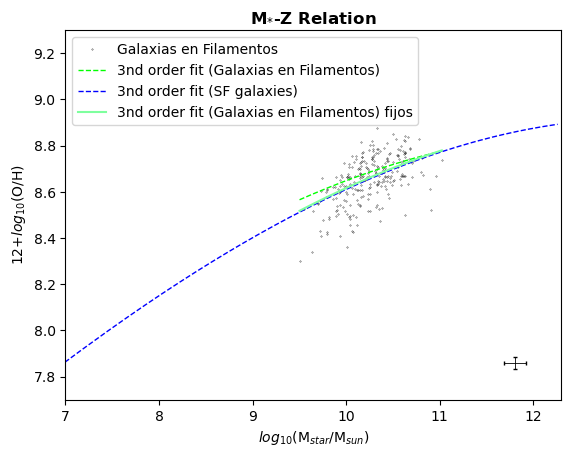

Coeficientes SF:  [-1.16349265e-03  1.04329863e-02  3.26303412e-01  5.46767976e+00]
Coeficientes Filamentos:  [-1.18399208e-03  9.33075279e-03  3.21861295e-01  5.68065239e+00]
Coeficientes d Filamentos Fijos:  [5.47340659]


In [26]:
#PLOTEAMOS M-Z RELATION FILAMENTOS
plot(logmstar_SF_fil,PPO4_SF_fil,".",markersize=0.5,color="black",label="Galaxias en Filamentos")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_fil),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS CON W FILAMENTOS
plot(sorted(ravel(logmstar_SF_fil)),sorted(y_fit_w_fil),"--",color="lime",label="3nd order fit (Galaxias en Filamentos)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS CON W DE LAS SF
plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS FIJANDO LOS COEFICEINTES a,b y c
a,b,c=p_w[0],p_w[1],p_w[2]
d_0_fil=p_w_fil[3]

#Modelo con a,b y c fijos
def model_fil(x_fil,d_fil):
    return a*x_fil**3+b*x_fil**2+c*x_fil+d_fil

#Ajuste con a,b y c fijos
coef_fil,cov_fil=curve_fit(model_fil,ravel(logmstar_SF_fil),ravel(PPO4_SF_fil),p0=[d_0_fil])

x_modelo_fil=linspace(min(logmstar_SF_fil),max(logmstar_SF_fil),100)
y_modelo_fil=model_fil(x_modelo_fil,coef_fil[0])

plot(x_modelo_fil,y_modelo_fil,color="#7eff9e",label="3nd order fit (Galaxias en Filamentos) fijos") #ajuste polinomial con pesos (w) y a,b y c fijos
legend()
show()

print("Coeficientes SF: ",p_w)
print("Coeficientes Filamentos: ",p_w_fil)
print("Coeficientes d Filamentos Fijos: ",coef_fil)

## Metallicities Tendrils with fixed coefficients a, b, and c

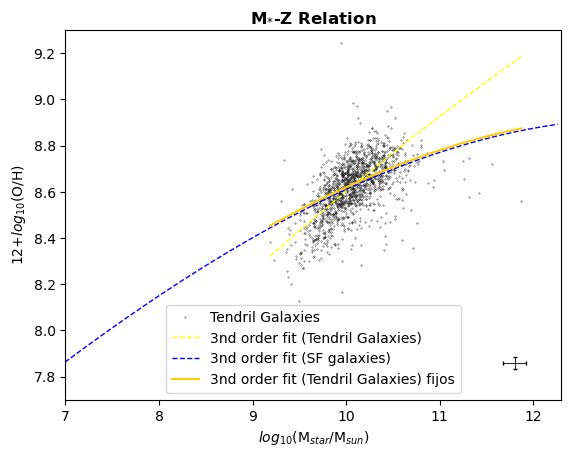

Coeficientes SF:  [-1.16349265e-03  1.04329863e-02  3.26303412e-01  5.46767976e+00]
Coeficientes Tendril:  [-8.67290196e-04  1.35850339e-02  3.25546875e-01  4.85603952e+00]
Coeficientes d Tendril Fijos:  [5.47698077]


In [27]:
#PLOTEAMOS M-Z RELATION TENDRILS
plot(logmstar_SF_tendril,PPO4_SF_tendril,".",markersize=0.5,color="black",label="Tendril Galaxies")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(7,12.3)
ylim(7.7,9.3)

errorbar(11.8,7.86,xerr=median(dellogmstar_SF_tendril),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#AJUSTE POR POLINOMIOS CON W FILAMENTOS
plot(sorted(ravel(logmstar_SF_tendril)),sorted(y_fit_w_tendril),"--",color="yellow",label="3nd order fit (Tendril Galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS CON W DE LAS SF
plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)

#AJUSTE POR POLINOMIOS FIJANDO LOS COEFICEINTES a,b y c
a,b,c=p_w[0],p_w[1],p_w[2]
d_0_tendril=p_w_tendril[3]

#Modelo con a,b y c fijos
def model_tendril(x_tendril,d_tendril):
    return a*x_tendril**3+b*x_tendril**2+c*x_tendril+d_tendril

#Ajuste con a,b y c fijos
coef_tendril,cov_tendril=curve_fit(model_tendril,ravel(logmstar_SF_tendril),ravel(PPO4_SF_tendril),p0=[d_0_tendril])

x_modelo_tendril=linspace(min(logmstar_SF_tendril),max(logmstar_SF_tendril),100)
y_modelo_tendril=model_tendril(x_modelo_tendril,coef_tendril[0])

plot(x_modelo_tendril,y_modelo_tendril,color="#FFCC00",label="3nd order fit (Tendril Galaxies) fijos") #ajuste polinomial con pesos (w) y a,b y c fijos
legend()
show()

print("Coeficientes SF: ",p_w)
print("Coeficientes Tendril: ",p_w_tendril)
print("Coeficientes d Tendril Fijos: ",coef_tendril)

## All metallicities with fixed coefficients a, b, and c

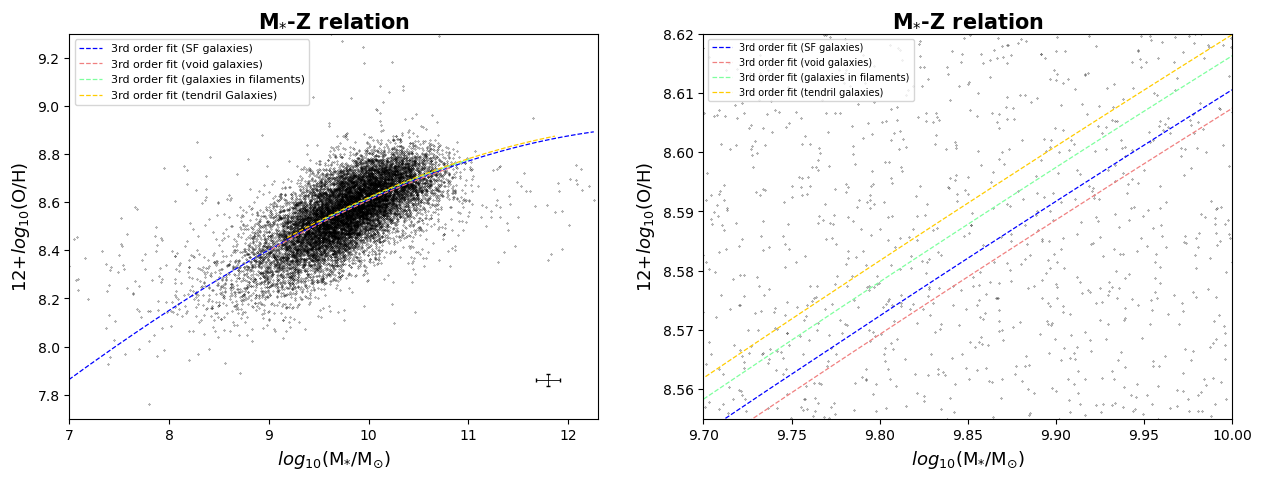

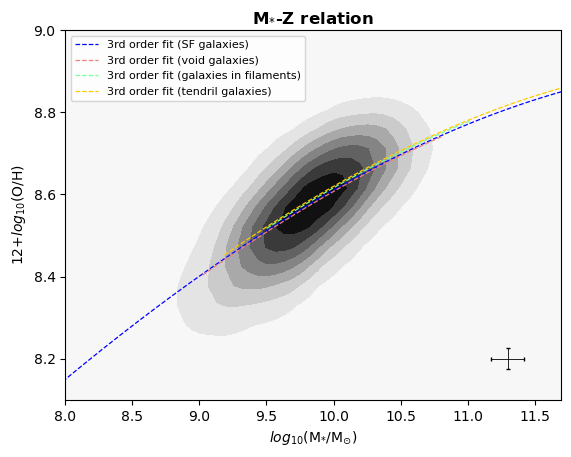

In [46]:
fig,(ax1,ax2)=subplots(1,2,figsize=(15,5))

#Ploteamos M-Z Relation SIN a,b,c FIJOS
ax1.plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black")

ax1.set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)",fontsize=13)
ax1.set_ylabel("12+$log_{10}$(O/H)",fontsize=13)
ax1.set_title("M$_{*}$-Z relation",weight="bold",fontsize=15)

ax1.set_xlim(7,12.3)
ax1.set_ylim(7.7,9.3)

ax1.errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

ax1.plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3rd order fit (SF galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w)
ax1.plot(x_modelo_void,y_modelo_void,"--",color="lightcoral",label="3rd order fit (void galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax1.plot(x_modelo_fil,y_modelo_fil,"--",color="#7eff9e",label="3rd order fit (galaxies in filaments)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax1.plot(x_modelo_tendril,y_modelo_tendril,"--",color="#FFCC00",label="3rd order fit (tendril Galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax1.legend(fontsize=8)

#Ploteamos M-Z Relation CON a,b,c FIJOS
ax2.plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black")

ax2.set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)",fontsize=13)
ax2.set_ylabel("12+$log_{10}$(O/H)",fontsize=13)
ax2.set_title("M$_{*}$-Z relation",weight="bold",fontsize=15)

ax2.set_xlim(9.7,10)
ax2.set_ylim(8.555,8.62)

ax2.errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

ax2.plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3rd order fit (SF galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w)
ax2.plot(x_modelo_void,y_modelo_void,"--",color="lightcoral",label="3rd order fit (void galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax2.plot(x_modelo_fil,y_modelo_fil,"--",color="#7eff9e",label="3rd order fit (galaxies in filaments)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax2.plot(x_modelo_tendril,y_modelo_tendril,"--",color="#FFCC00",label="3rd order fit (tendril galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
ax2.legend(fontsize=7)

#GUARDAR PLOT
#savefig("Metallicites_fits.pdf",bbox_inches="tight") 
show()

#Crea el gráfico de densidad de puntos difuminados
contourf(xi,yi,zi.reshape(xi.shape),cmap="Greys")

xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z relation",weight="bold")

xlim(8,11.7)
ylim(8.1,9)

errorbar(11.3,8.2,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3rd order fit (SF galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w)
plot(x_modelo_void,y_modelo_void,"--",color="lightcoral",label="3rd order fit (void galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
plot(x_modelo_fil,y_modelo_fil,"--",color="#7eff9e",label="3rd order fit (galaxies in filaments)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
plot(x_modelo_tendril,y_modelo_tendril,"--",color="#FFCC00",label="3rd order fit (tendril galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
legend(fontsize=8)

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()


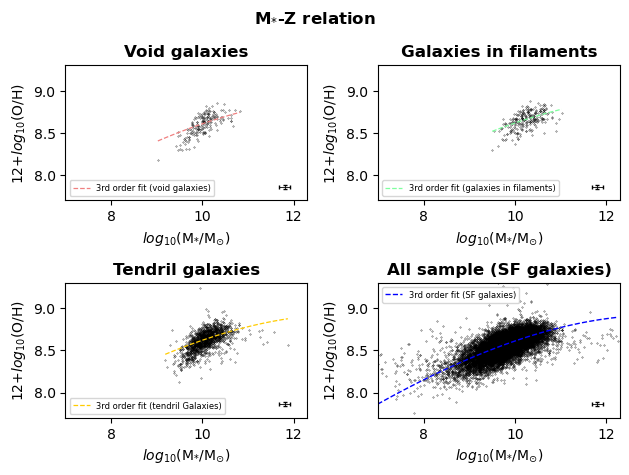

In [29]:
fig,axs=subplots(2,2) #juntar grafiguras en una figura
fig.suptitle("M$_{*}$-Z relation",weight="bold")

#Ploteamos M-Z Relation (VOID GALAXIES)
axs[0,0].plot(logmstar_SF_void,PPO4_SF_void,".",markersize=0.5,color="black")

axs[0,0].set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)")
axs[0,0].set_ylabel("12+$log_{10}$(O/H)")
axs[0,0].set_title("Void galaxies",weight="bold")

axs[0,0].set_xlim(7,12.3)
axs[0,0].set_ylim(7.7,9.3)

axs[0,0].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_void),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[0,0].plot(x_modelo_void,y_modelo_void,"--",color="lightcoral",label="3rd order fit (void galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos

axs[0,0].legend(fontsize=6)

#Ploteamos M-Z Relation (TENDRIL GALAXIES)
axs[1,0].plot(logmstar_SF_tendril,PPO4_SF_tendril,".",markersize=0.5,color="black")

axs[1,0].set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)")
axs[1,0].set_ylabel("12+$log_{10}$(O/H)")
axs[1,0].set_title("Tendril galaxies",weight="bold")

axs[1,0].set_xlim(7,12.3)
axs[1,0].set_ylim(7.7,9.3)

axs[1,0].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_tendril),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[1,0].plot(x_modelo_tendril,y_modelo_tendril,"--",color="#FFCC00",label="3rd order fit (tendril Galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
axs[1,0].legend(fontsize=6)

#Ploteamos M-Z Relation (GALAXIES IN FILAMENTS)
axs[0,1].plot(logmstar_SF_fil,PPO4_SF_fil,".",markersize=0.5,color="black")

axs[0,1].set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)")
axs[0,1].set_ylabel("12+$log_{10}$(O/H)")
axs[0,1].set_title("Galaxies in filaments",weight="bold")

axs[0,1].set_xlim(7,12.3)
axs[0,1].set_ylim(7.7,9.3)

axs[0,1].errorbar(11.8,7.86,xerr=median(dellogmstar_SF_fil),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[0,1].plot(x_modelo_fil,y_modelo_fil,"--",color="#7eff9e",label="3rd order fit (galaxies in filaments)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos

axs[0,1].legend(fontsize=6)

#Ploteamos M-Z Relation (SF GALAXIES)
axs[1,1].plot(logmstar_SF,PPO4_SF,".",markersize=0.5,color="black")

axs[1,1].set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)")
axs[1,1].set_ylabel("12+$log_{10}$(O/H)")
axs[1,1].set_title("All sample (SF galaxies)",weight="bold")

axs[1,1].set_xlim(7,12.3)
axs[1,1].set_ylim(7.7,9.3)

axs[1,1].errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

axs[1,1].plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3rd order fit (SF galaxies)",linewidth=1) #ajuste polinomial con pesos (w)
axs[1,1].legend(fontsize=6)

fig.tight_layout() #ajustar figuras

#GUARDAR PLOT
#savefig("Metallicities_comparation.pdf",bbox_inches="tight") 
show()

## BPT Diagram y M-Z Relation with colors

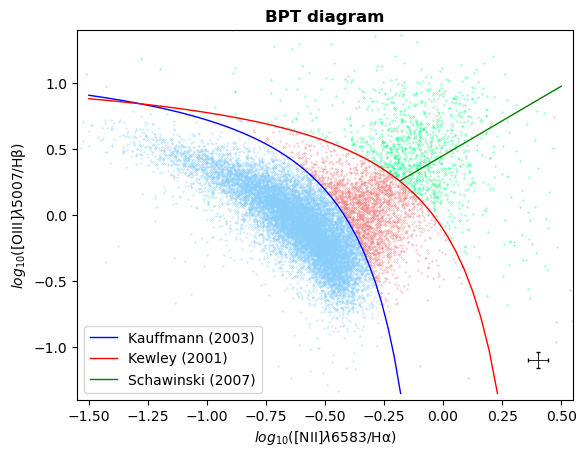

In [30]:
# función para trazar las líneas Kauffman, Kewley y Schawinski
def plot_lines():
    x_Kauffman=linspace(-1.5,-0.18) #Kauffman
    y_Kauffman=(0.61/(x_Kauffman-0.05))+1.3 
    plot(x_Kauffman,y_Kauffman,color="blue",label="Kauffmann (2003)",linewidth=1)

    x_kewley=linspace(-1.5,0.23) #Kewley
    y_Kewley=(0.61/(x_kewley-0.47))+1.19 
    plot(x_kewley,y_Kewley,color="red",label="Kewley (2001)",linewidth=1)

    x_Schawinski=linspace(-0.180,0.5) #Schawinski
    y_Schawinski=1.05*x_Schawinski+0.45
    plot(x_Schawinski,y_Schawinski,color="green",label="Schawinski (2007)",linewidth=1)

# filtramos los valores de "GALAXY_TYPE" y los ploteamos
mask_S=datos["GALAXY_TYPE"]=="S"
mask_A=datos["GALAXY_TYPE"]=="A"
mask_C=datos["GALAXY_TYPE"]=="C"

plot(log10(array(NII6583)[mask_S]/array(Ha)[mask_S]),log10(array(OIII5007)[mask_S]/array(Hb)[mask_S]),".",markersize=0.5,color="lightskyblue")
plot(log10(array(NII6583)[mask_A]/array(Ha)[mask_A]),log10(array(OIII5007)[mask_A]/array(Hb)[mask_A]),".",markersize=0.5,color="springgreen") 
plot(log10(array(NII6583)[mask_C]/array(Ha)[mask_C]),log10(array(OIII5007)[mask_C]/array(Hb)[mask_C]),".",markersize=0.5,color="lightcoral") 

xlabel("$log_{10}$([NII]$\lambda$6583/H\u03B1)")
ylabel("$log_{10}$([OIII]$\lambda$5007/H\u03B2)")
title("BPT diagram",weight="bold")

# trazamos las líneas
plot_lines()

xlim(-1.55,0.55)
ylim(-1.4,1.4)
errorbar(0.4,-1.1,xerr=0.041994829846394,yerr=0.0610989829348798,color="black",elinewidth=0.6,capsize=1.2) #barras de error

legend()
#GUARDAR PLOT
#savefig("test2.pdf",bbox_inches="tight") 
show()

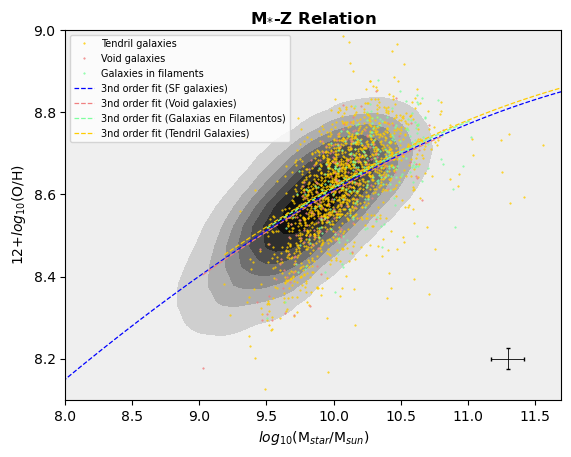

In [31]:
#Graficamos los datos por colores
plot(logmstar_SF_tendril, PPO4_SF_tendril, ".",markersize=1, color="#FFCC00",label="Tendril galaxies")
plot(logmstar_SF_void, PPO4_SF_void, ".",markersize=1, color="lightcoral", label="Void galaxies")
plot(logmstar_SF_fil, PPO4_SF_fil, ".",markersize=1, color="#7eff9e", label="Galaxies in filaments")

#Resto del código sin cambios
xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation", weight="bold")

xlim(7, 12.3)
ylim(7.7, 9.3)

plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"--",color="blue",label="3nd order fit (SF galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w)
plot(x_modelo_void,y_modelo_void,"--",color="lightcoral",label="3nd order fit (Void galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
plot(x_modelo_fil,y_modelo_fil,"--",color="#7eff9e",label="3nd order fit (Galaxias en Filamentos)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
plot(x_modelo_tendril,y_modelo_tendril,"--",color="#FFCC00",label="3nd order fit (Tendril Galaxies)",linewidth=0.9) #ajuste polinomial con pesos (w) y a,b y c fijos
legend(fontsize=7)

#Crea el gráfico de densidad de puntos difuminados
contourf(xi,yi,zi.reshape(xi.shape),cmap="binary")

xlabel("$log_{10}$(M$_{star}$/M$_{sun}$)")
ylabel("12+$log_{10}$(O/H)")
title("M$_{*}$-Z Relation",weight="bold")

xlim(8,11.7)
ylim(8.1,9)

errorbar(11.3,8.2,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

#GUARDAR PLOT
#savefig("test.pdf",bbox_inches="tight") 
show()

## Marginal Histogram Metallicities

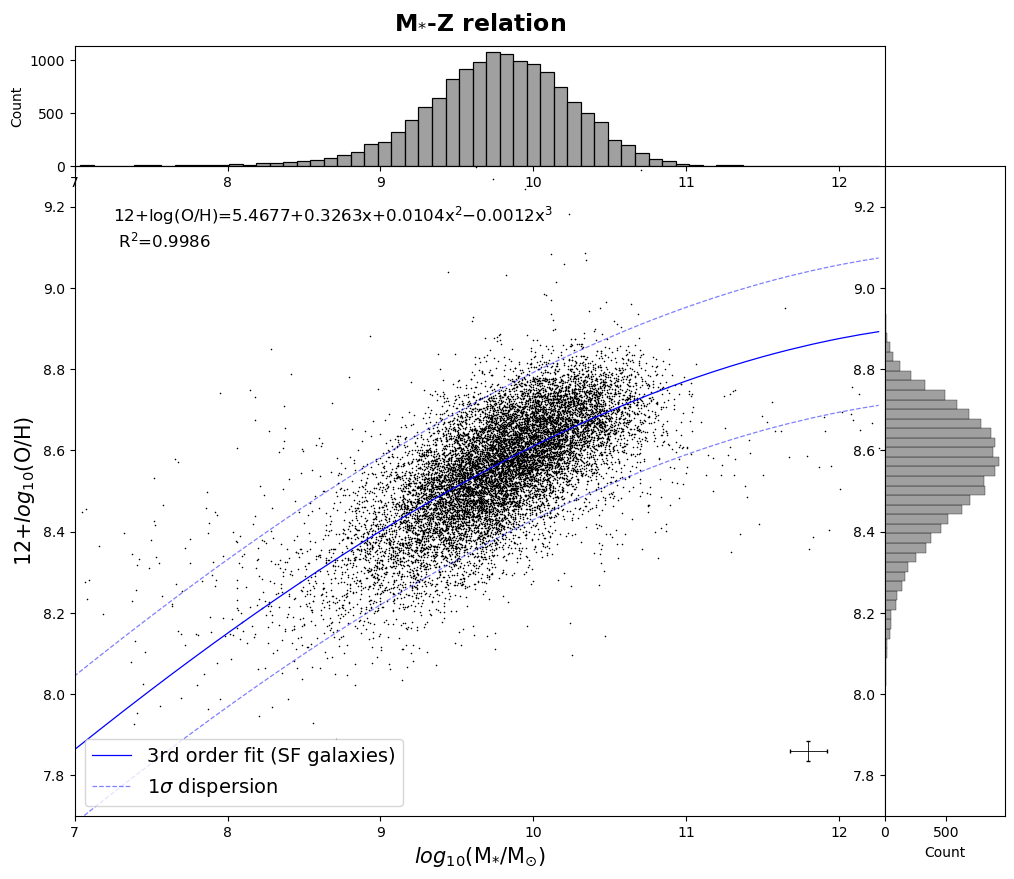

In [32]:
#Crear el subplot principal y los subplots marginales usando make_axes_locatable
fig, ax=subplots(figsize=(12,10))
divider=make_axes_locatable(ax)
ax_histx=divider.append_axes("top",size=1.2,pad=0,sharex=ax)
ax_histy=divider.append_axes("right",size=1.2,pad=0,sharey=ax)

#Ploteamos M-Z Relation
scatterplot(x=ravel(logmstar_SF),y=ravel(PPO4_SF),ax=ax,s=1,color="black",edgecolor="black")

#Ajuste polinomial con pesos (w)
ax.plot(sorted(ravel(logmstar_SF)),sorted(y_fit_w),"-",color="blue",label="3rd order fit (SF galaxies)",linewidth=0.9) 

#Dispersion del ajuste
dispersion=std(resid)
y_upper=y_fit_w+dispersion
y_lower=y_fit_w-dispersion

ax.plot(sorted(ravel(logmstar_SF)),sorted(y_upper),"--",color="blue",linewidth=0.9,alpha=0.5) 
ax.plot(sorted(ravel(logmstar_SF)),sorted(y_lower),"--",color="blue",label="1$\sigma$ dispersion",linewidth=0.9,alpha=0.5) 

# Crea los histogramas marginales
histplot(x=ravel(logmstar_SF), ax=ax_histx, bins=70, color="gray")
histplot(y=ravel(PPO4_SF),ax=ax_histy,bins=200, orientation="horizontal",color="gray")

# Ajusta los límites de los subplots principales
ax.set_xlim(7,12.3)
ax.set_ylim(7.7,9.3)

# Ajusta las etiquetas de los subplots principales
ax.set_xlabel("$log_{10}$(M$_{*}$/M$_{\odot}$)",fontsize=15)
ax.set_ylabel("12+$log_{10}$(O/H)",fontsize=15)
ax.set_title("M$_{*}$-Z relation",weight="bold",y=1.2,fontsize=17)

ax.errorbar(11.8,7.86,xerr=median(dellogmstar_SF),yerr=0.0252189442516711,color="black",elinewidth=0.6,capsize=1.2) #barras de error

ax.text(7.25,9.1,"12+log(O/H)=5.4677+0.3263x+0.0104x$^2$−0.0012x$^3$ \n R$^2$=0.9986",fontsize=12)

ax.legend(loc="lower left",fontsize=14)
#GUARDAR PLOT
#savefig("Metallicity_marginal_histogram.pdf",bbox_inches="tight") 
show()


## Histograma Void, Filaments, Tendrils and SF Galaxies

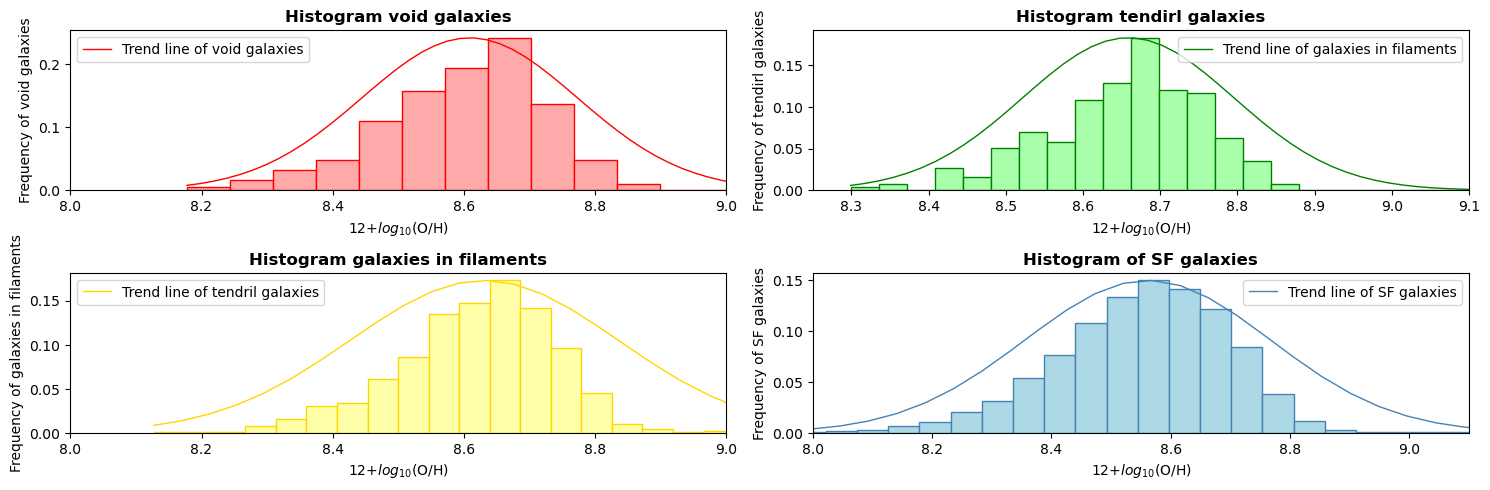

In [33]:
#fig,(ax1,ax2,ax3,ax4)=subplots(2,2)
fig,((ax1,ax2),(ax3,ax4))=subplots(2,2,figsize=(15,5))

#PPO4_SF_void
n_void,bins_void,patches_void=ax1.hist(PPO4_SF_void,bins=30,color="#FFAAAA",edgecolor="red",weights=ones(len(PPO4_SF_void))/len(PPO4_SF_void))

#ajuste de la línea de densidad
mu_void,sigma_void=mean(PPO4_SF_void),std(PPO4_SF_void)
x_void=linspace(min(PPO4_SF_void),max(PPO4_SF_void),100)
y_void=1/(sigma_void*sqrt(2*pi))*exp(-(x_void-mu_void)**2/(2*sigma_void**2))
scale_factor_void=max(n_void)/max(y_void) # factor de escala para ajustar la línea de densidad
ax1.plot(x_void,y_void*scale_factor_void,color="red",linestyle="-",linewidth=1,label="Trend line of void galaxies")

#ajuste de la altura de las barras
for i in range(len(patches_void)):
    patches_void[i].set_height(n_void[i])

#etiquetas y título
ax1.set_title("Histogram void galaxies", weight="bold")
ax1.set_xlabel("12+$log_{10}$(O/H)")
ax1.set_ylabel("Frequency of void galaxies")
ax1.set_xlim(8,9)
ax1.legend()

#PPO4_SF_fil
n_fil,bins_fil,patches_fil=ax2.hist(PPO4_SF_fil,bins=50,color="#AAFFAA",edgecolor="green",weights=ones(len(ravel(PPO4_SF_fil)))/len(ravel(PPO4_SF_fil)))

#ajuste de la línea de densidad
mu_fil,sigma_fil=mean(PPO4_SF_fil),std(PPO4_SF_fil)
x_fil=linspace(min(PPO4_SF_fil),max(PPO4_SF_fil),100)
y_fil=1/(sigma_fil*sqrt(2*pi))*exp(-(x_fil-mu_fil)**2/(2*sigma_fil**2))
scale_factor_fil=max(n_fil)/max(y_fil) # factor de escala para ajustar la línea de densidad
ax2.plot(x_fil,y_fil*scale_factor_fil,color="green",linestyle="-",linewidth=1,label="Trend line of galaxies in filaments")

#ajuste de la altura de las barras
for i in range(len(patches_fil)):
    patches_fil[i].set_height(n_fil[i])

#etiquetas y título
ax2.set_title("Histogram tendirl galaxies", weight="bold")
ax2.set_xlabel("12+$log_{10}$(O/H)")
ax2.set_ylabel("Frequency of tendirl galaxies")
ax2.set_xlim(8.25,9.1)
ax2.legend()

#PPO4_SF_tendril
n_tendril,bins_tendril,patches_tendril=ax3.hist(PPO4_SF_tendril,bins=90,color="#FFFFAA",edgecolor="gold",weights=ones(len(ravel(PPO4_SF_tendril)))/len(ravel(PPO4_SF_tendril)))

#ajuste de la línea de densidad
mu_tendril,sigma_tendril=mean(PPO4_SF_tendril),std(PPO4_SF_tendril)
x_tendril=linspace(min(PPO4_SF_tendril),max(PPO4_SF_tendril),100)
y_tendril=1/(sigma_tendril*sqrt(2*pi))*exp(-(x_tendril-mu_tendril)**2/(2*sigma_tendril**2))
scale_factor_tendril=max(n_tendril)/max(y_tendril) # factor de escala para ajustar la línea de densidad
ax3.plot(x_tendril,y_tendril*scale_factor_tendril,color="gold",linestyle="-",linewidth=1,label="Trend line of tendril galaxies")

#ajuste de la altura de las barras
for i in range(len(patches_tendril)):
    patches_tendril[i].set_height(n_tendril[i])

#etiquetas y título
ax3.set_title("Histogram galaxies in filaments",weight="bold")
ax3.set_xlabel("12+$log_{10}$(O/H)")
ax3.set_ylabel("Frequency of galaxies in filaments")
ax3.set_xlim(8,9)
ax3.legend()


#PPO4_SF
n_SF,bins_SF,patches_SF=ax4.hist(ravel(PPO4_SF),bins=90,color="#ADD8E6",edgecolor="#4682B4",weights=ones(len(ravel(PPO4_SF)))/len(ravel(PPO4_SF)))

#ajuste de la línea de densidad
mu_SF,sigma_SF=mean(PPO4_SF),std(PPO4_SF)
x_SF=linspace(min(PPO4_SF),max(PPO4_SF),100)
y_SF=1/(sigma_SF*sqrt(2*pi))*exp(-(x_SF-mu_SF)**2/(2*sigma_SF**2))
scale_factor_SF=max(n_SF)/max(y_SF) # factor de escala para ajustar la línea de densidad
ax4.plot(x_SF,y_SF*scale_factor_SF,color="#4682B4",linestyle="-",linewidth=1,label="Trend line of SF galaxies")

#ajuste de la altura de las barras
for i in range(len(patches_SF)):
    patches_SF[i].set_height(n_SF[i])

#etiquetas y título
ax4.set_title("Histogram of SF galaxies",weight="bold")
ax4.set_xlabel("12+$log_{10}$(O/H)")
ax4.set_ylabel("Frequency of SF galaxies")
ax4.set_xlim(8,9.1)
ax4.legend()

fig.tight_layout() #ajustar figuras

#GUARDAR PLOT
#savefig("test4.pdf",bbox_inches="tight") 

show()


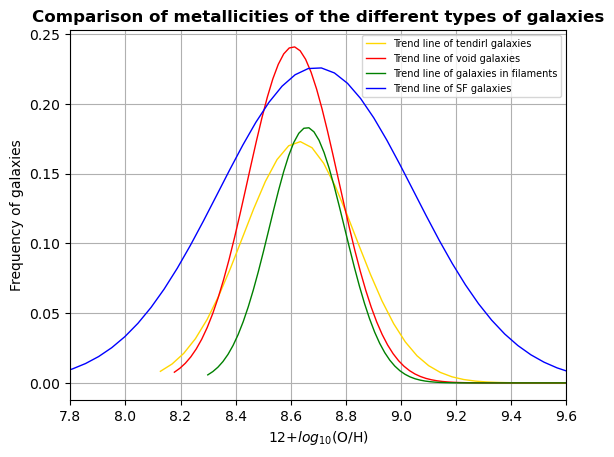

In [34]:
plot(x_tendril,y_tendril*scale_factor_tendril,color="gold",linestyle="-",linewidth=1,label="Trend line of tendirl galaxies")
#axvline(x=mean(PPO4_SF_tendril),linestyle="--",color="gold",label="Mean of tendril galaxies")
plot(x_void,y_void*scale_factor_void,color="red",linestyle="-",linewidth=1,label="Trend line of void galaxies")
#axvline(x=mean(PPO4_SF_void),linestyle="--",color="red",label="Mean of void galaxies")
plot(x_fil,y_fil*scale_factor_fil,color="green",linestyle="-",linewidth=1,label="Trend line of galaxies in filaments")
#axvline(x=mean(PPO4_SF_fil),linestyle="--",color="green",label="Mean of galaxies in filaments")
plot(x_SF,y_fil*scale_factor_SF,color="blue",linestyle="-",linewidth=1,label="Trend line of SF galaxies")
#axvline(x=mean(ravel(PPO4_SF)),linestyle="--",color="blue",label="Mean of SF galaxies")

title("Comparison of metallicities of the different types of galaxies",weight="bold")
xlabel("12+$log_{10}$(O/H)")
ylabel("Frequency of galaxies")
xlim(7.8,9.6)
legend(loc="upper right",fontsize=7)
grid(True)

#GUARDAR PLOT
#savefig("test3.pdf",bbox_inches="tight") 
show()


# Determinations Coefficients R$^2$

In [35]:
r2=r2_score(ravel(PPO4_SF),y_fit_w,sample_weight=w)
r2_void=r2_score(ravel(PPO4_SF_void),y_fit_w_void,sample_weight=w_void)
r2_fil=r2_score(ravel(PPO4_SF_fil),y_fit_w_fil,sample_weight=w_fil)
r2_tendril=r2_score(ravel(PPO4_SF_tendril),y_fit_w_tendril,sample_weight=w_tendril)

print(r2_fil)
print(r2_tendril)
print(r2_void)
print(r2)

0.8916213761016947
0.9597690598622958
0.999649734550227
0.9985803208130357
